# **Lending Club Case Study**

## **Goal**
- **Conduct Exploratory Data Analysis (EDA)** to identify patterns and factors influencing loan defaults.
- **Analyze historical loan data** to uncover key insights and correlations between consumer attributes, loan attributes, and default likelihood.

## **Problem Statement**
- The consumer finance company faces two risks: 
  - **Approving loans to likely defaulters**
  - **Rejecting loans to reliable borrowers**
- The challenge is to **analyze the data** and provide actionable insights to improve decision-making, reduce financial losses from defaults, and maximize business opportunities.

## **Target**
- **Perform a comprehensive analysis** of loan data to understand trends, patterns, and relationships affecting loan defaults.
- **Identify potential risk factors and drivers** to guide better decision-making within the company.

## **Risks**
- **Financial Loss due to Defaults:** Minimizing credit losses by understanding default patterns.
- **Loss of Business Opportunity:** Optimizing lending strategies through EDA to maximize profitability and reduce missed opportunities.


In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [2]:
#reading the data
loan_data = pd.read_csv('loan.csv')

# 1. Data Cleaning

## 1.1 To check for the presence of headers, footers, or summary details rows and remove them from the data if present

In [3]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [4]:
loan_data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

**No headers or summary rows present. No footer or summary rows/ Total or Subtotal rows present either present.**

In [5]:
loan_data.shape

(39717, 111)

Number of rows: **39717**  

Number of columns: **111**

## 1.2 Removing unnecessary columns from the dataset

In [6]:
# Checking null percentage for each column
null_percentage = loan_data.isnull().mean() * 100

In [7]:
null_percentage

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

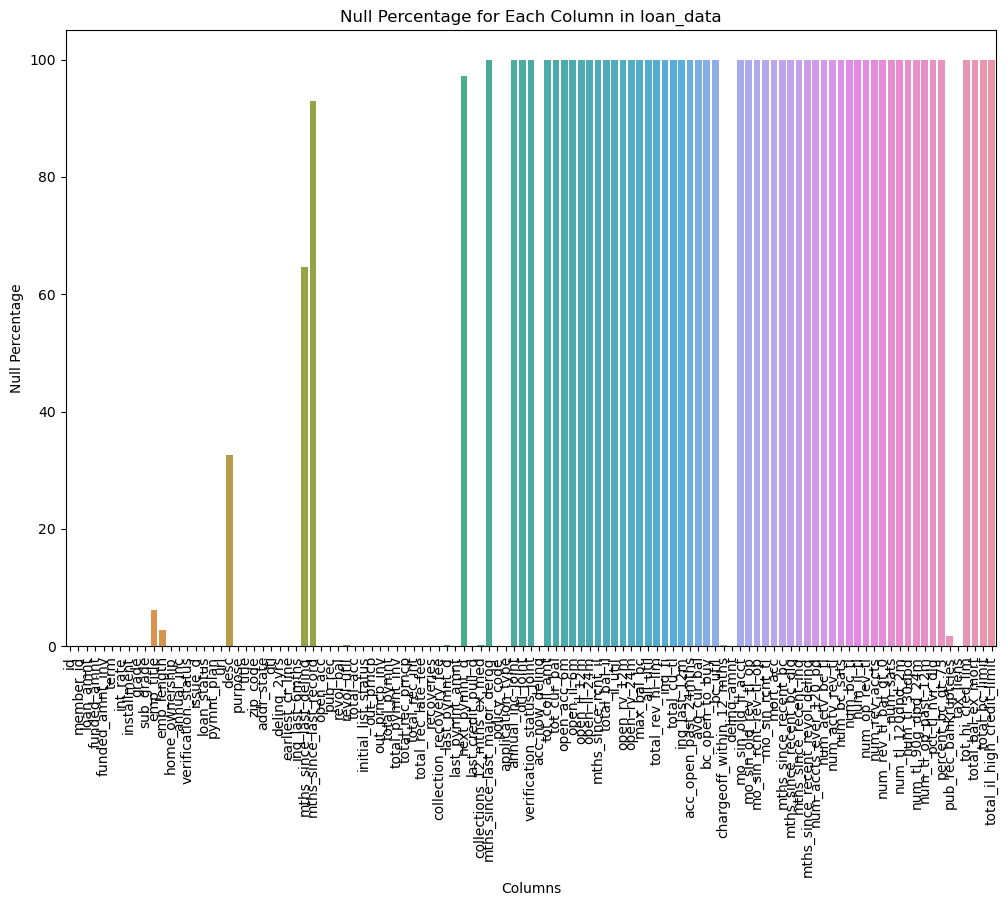

In [8]:
# Calculate the null percentage for each column
null_percentage = loan_data.isnull().mean() * 100

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.title('Null Percentage for Each Column in loan_data')
plt.show()

Most of the columns has 100% Null values and can be safely droped. There are some columns where NULL value 
rate is  65%, 93% and 97%. 93% and 97% columns can be dropped as well. It is now necessary to put a 
threshold of the rate. Looking into the criticality of the columns and NULL values rate, it is okay to consider 
the rate as 30%. So any Columns having NaN or NULL values greater than or equal to 30% can be safely dropped.

Therefore, Threshold Dropped Percentage Rate = 30%

**Many columns have more than 50% missing values and are not useful, so they can be dropped.**

In [9]:
threshold = 50
columns_to_drop = null_percentage[null_percentage > threshold].index
print(columns_to_drop)
loan_data.drop(columns_to_drop, axis=1, inplace=True)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

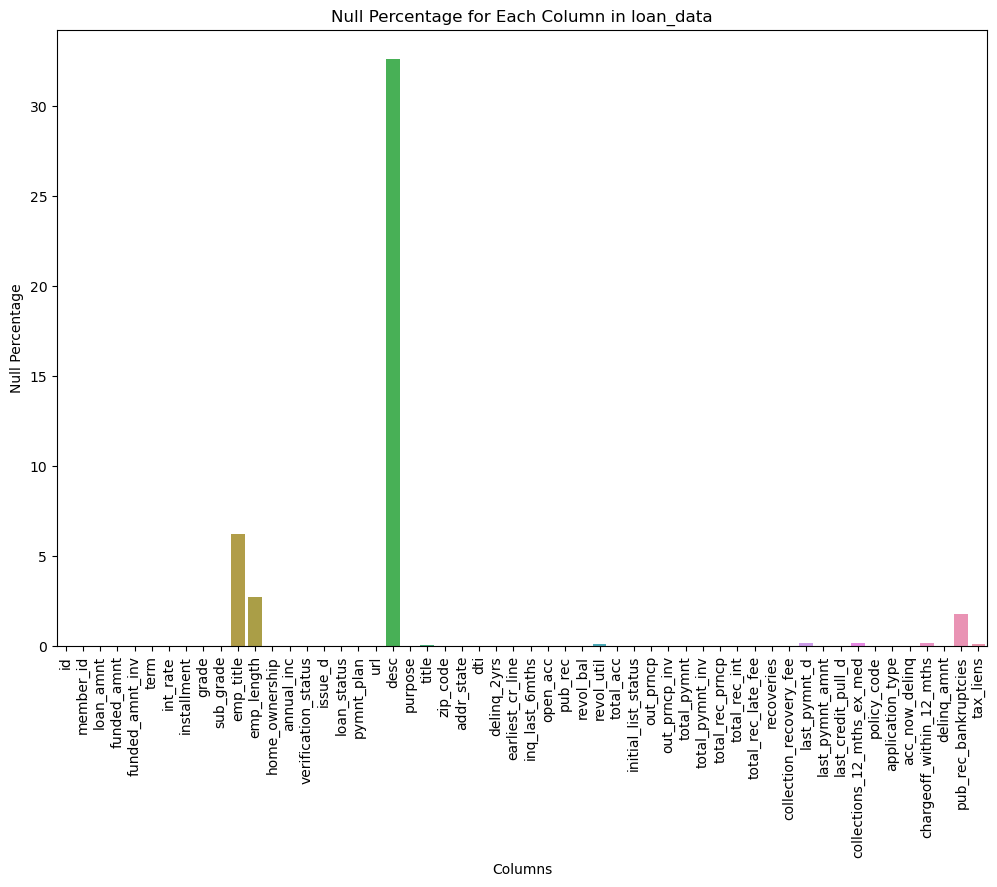

In [10]:
# Calculate the null percentage for each column
null_percentage = loan_data.isnull().mean() * 100

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=null_percentage.index, y=null_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.title('Null Percentage for Each Column in loan_data')
plt.show()

In [11]:
null_percentage = loan_data.isnull().mean() * 100

In [12]:
null_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
# Filter columns where there are missing values
columns_with_missing_values = null_percentage[null_percentage > 0]

# Print the list of columns and their respective percentages of missing values
print("Columns with missing values and their percentage:")
print(columns_with_missing_values)

Columns with missing values and their percentage:
emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64


In [14]:
columns_with_missing_values=columns_with_missing_values.index

In [15]:
columns_with_missing_values

Index(['emp_title', 'emp_length', 'desc', 'title', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

**Handling Columns with Missing Values**

In our dataset, we have identified several columns that contain missing values. These columns are crucial for our analysis and may require special treatment to ensure the integrity and accuracy of our results. Below is a list of columns with missing values 

'emp_title', 'emp_length', 'desc', 'title', 'revol_util','last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'

In [16]:
loan_data.shape

(39717, 54)

In [17]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [18]:
# Finding columns with only one unique value
single_value_columns = loan_data.loc[:,loan_data.nunique() == 1].columns
print(single_value_columns)
print('Count of these types of columns are {}'.format(len(single_value_columns)))

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
Count of these types of columns are 9


In [19]:
single_value_columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [20]:
# Dropping the single_value_columns which are 9
loan_data.drop(single_value_columns, axis=1, inplace=True)

In [21]:
loan_data.shape

(39717, 45)

In [22]:
# Checking Loan Status and their counts
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [23]:
# percentage wise distribution
loan_data['loan_status'].value_counts()*100/len(loan_data)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [24]:
# As per the providied statement above we don't get any conclusive data from the Current loan status accounts; so we can drop these rows
loan_data = loan_data[loan_data['loan_status']!='Current']

In [25]:
#checking if we have any duplicate rows
num_duplicates = loan_data.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [26]:
# Data shape till now
loan_data.shape

(38577, 45)

In [27]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
5  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
5            0           Nov-04               3         9        0       7963   

  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0     83.70%          9        0.0            0.0   5863.155187   
1      9.40%          4        0.0            0.0   1008.710000   
2     98.50%         10        0.0            0.0   3005.666844   
3        21%         37        0.0            0.0  12231.890000   
5     28.30%         12        0.0            0.0   5632.210000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
5          5632.21          5000.00         632.21                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00 

In [28]:
loan_data["emp_title"].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [29]:
#columns dont have much info or not relavent for analysis -emp_title, url,desc,zip_code

In [30]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Deleting the Uneccessasry Columns

**Columns not holding any information**
1. desc 
2. title 
**id columns** Dropping id and member_id columns is advised because they typically serve as non-informative, unique identifiers without meaningful insights for analysis, thus simplifying data handling and ensuring privacy.

**emp_title:** The job title supplied by the borrower not directly relevant to the analysis it can be dropped.

**zip_code:** While it provides geographical information, the first three digits of the zip code might not be sufficiently granular for meaningful analysis 

**earliest_cr_line:** This column represents the date when the borrower’s earliest reported credit line was opened. It is typically recorded in a month-year format (e.g., "Jan-2000"). not that important

**last_credit_pull_d:** This column represents the most recent date when the lender (in this case, LendingClub) pulled the borrower’s credit report. It is typically recorded in a month-year format (e.g., "Dec-2023").this column can be dropped

**out_prncp:** Remaining outstanding principal for total amount funded. Since this information pertains to the remaining principal balance, it might not contribute significantly to predicting loan default.

**total_pymnt:** Total payments received to date for the total amount funded. This column represents the total payments received, which might not be relevant for predicting loan default at the time of application approval.

**total_rec_prncp:** Principal received to date. Similar to total_pymnt, this column represents historical data on payments received and may not be relevant for predicting loan default upfront.

**total_rec_int:** Interest received to date. While interest payments are important for loan performance, they might not strongly indicate loan default at the time of application approval.

**last_pymnt_d:** Last month payment was received. Since this column represents historical data on payment dates, it might not be relevant for predicting loan default upfront.

**last_pymnt_amnt:**Last total payment amount received. Similar to last_pymnt_d, this column represents historical payment data and may not strongly indicate loan default at the time of application approval.

since **"funded_amnt_inv"** already provides information about the actual amount funded by investors, **"funded_amnt"** becomes redundant and can be removed from the dataset.



In [31]:
columns_to_remove = [
    "desc",
    "title",
    "emp_title",
    "zip_code",
    "earliest_cr_line",
    "last_credit_pull_d",
    "out_prncp",
    "total_pymnt",
    "total_rec_prncp",
    "total_rec_int",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "funded_amnt",
    "url",
    'id', 
    'member_id']

In [32]:
loan_data.drop(columns=columns_to_remove, inplace=True)

In [33]:
loan_data

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0           5000           4975.0   36 months   10.65%       162.87     B   
1           2500           2500.0   60 months   15.27%        59.83     C   
2           2400           2400.0   36 months   15.96%        84.33     C   
3          10000          10000.0   36 months   13.49%       339.31     C   
5           5000           5000.0   36 months    7.90%       156.46     A   
...          ...              ...         ...      ...          ...   ...   
39712       2500           1075.0   36 months    8.07%        78.42     A   
39713       8500            875.0   36 months   10.28%       275.38     C   
39714       5000           1325.0   36 months    8.07%       156.84     A   
39715       5000            650.0   36 months    7.43%       155.38     A   
39716       7500            800.0   36 months   13.75%       255.43     E   

      sub_grade emp_length home_ownership  annual_inc verification_status  \
0            B2  10+ years           RENT     24000.0            Verified   
1            C4   < 1 year           RENT     30000.0     Source Verified   
2            C5  10+ years           RENT     12252.0        Not Verified   
3            C1  10+ years           RENT     49200.0     Source Verified   
5            A4    3 years           RENT     36000.0     Source Verified   
...         ...        ...            ...         ...                 ...   
39712        A4    4 years       MORTGAGE    110000.0        Not Verified   
39713        C1    3 years           RENT     18000.0        Not Verified   
39714        A4   < 1 year       MORTGAGE    100000.0        Not Verified   
39715        A2   < 1 year       MORTGAGE    200000.0        Not Verified   
39716        E2   < 1 year            OWN     22000.0        Not Verified   

      issue_d  loan_status             purpose addr_state    dti  delinq_2yrs  \
0      Dec-11   Fully Paid         credit_card         AZ  27.65            0   
1      Dec-11  Charged Off                 car         GA   1.00            0   
2      Dec-11   Fully Paid      small_business         IL   8.72            0   
3      Dec-11   Fully Paid               other         CA  20.00            0   
5      Dec-11   Fully Paid             wedding         AZ  11.20            0   
...       ...          ...                 ...        ...    ...          ...   
39712  Jul-07   Fully Paid    home_improvement         CO  11.33            0   
39713  Jul-07   Fully Paid         credit_card         NC   6.40            1   
39714  Jul-07   Fully Paid  debt_consolidation         MA   2.30            0   
39715  Jul-07   Fully Paid               other         MD   3.72            0   
39716  Jun-07   Fully Paid  debt_consolidation         MA  14.29            1   

       inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                   1         3        0      13648     83.70%          9   
1                   5         3        0       1687      9.40%          4   
2                   2         2        0       2956     98.50%         10   
3                   1        10        0       5598        21%         37   
5                   3         9        0       7963     28.30%         12   
...               ...       ...      ...        ...        ...        ...   
39712               0        13        0       7274     13.10%         40   
39713               1         6        0       8847     26.90%          9   
39714               0        11        0       9698     19.40%         20   
39715               0        17        0      85607      0.70%         26   
39716               0         7        0       4175     51.50%          8   

       out_prncp_inv  total_pymnt_inv  total_rec_late_fee  recoveries  \
0                0.0          5833.84                0.00        0.00   
1                0.0          1008.71                0.00      117.08   
2                0.0          3005.67   

# 2. Data Conversion

In [34]:
#displays the data types of each column in the loan_data DataFrame
loan_data.dtypes

loan_amnt                    int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp_inv              float64
total_pymnt_inv            float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
pub_rec_bankruptcies

In [35]:
# Firstly, Unique values in the 'term' column.- string portion should be removed and we need to convert that into numeric column
loan_data['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [36]:
#Extract numeric values from the 'term' column and convert to numeric type
loan_data['term']=pd.to_numeric(loan_data['term'].apply(lambda x: x.split(" ")[1]))

In [37]:
loan_data['term'].dtype

dtype('int64')

#### Converting 'int_rate' to float dtype

In [38]:
#first checking the frequency count of unique values in the 'int_rate' column
loan_data['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [39]:
# Converting 'int_rate' to float
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].apply(lambda x: x.split('%')[0]))

In [40]:
loan_data['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

#### dealing with 'emp_length' 

The below function, fix_emp_length_values, is designed to clean and standardize the values in the 'emp_length' column. It removes any occurrences of the string "years" and "<", as well as any spaces. This cleaning process ensures that the 'emp_length' values are consistent and formatted properly for further analysis. 

In [41]:
loan_data['emp_length'].dtype

dtype('O')

In [42]:
loan_data['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [43]:
loan_data['emp_length']=loan_data['emp_length'].str.replace("years","").str.replace("year","").str.replace("+","").str.replace("<","").str.strip()
loan_data['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

#### rounds the values to two decimal places

In [44]:
# Rounding off the belows to two decimals points.
for col in ['funded_amnt_inv', 'int_rate', 'dti']:
    loan_data[col] = loan_data[col].apply(lambda x: round(x,2))
    print(loan_data[col])

0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 38577, dtype: float64


#### Converting 'issue_d' to date type 

In [45]:
#converting issue_d`to date type
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [46]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv',
       'total_pymnt_inv', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'pub_rec_bankruptcies'],
      dtype='object')

# derived metrics 


**Recovery Ratio:**

Description: Calculate the ratio of recovered amount to the total amount funded by investors.

In [47]:
# Calculate recovery_ratio, handling division by zero
loan_data['recovery_ratio'] = loan_data['recoveries'] / loan_data['funded_amnt_inv']

# Replace inf with NaN
loan_data['recovery_ratio'] = loan_data['recovery_ratio'].replace([np.inf, -np.inf], np.nan)

# Replace NaN and very small values with 0 or any other appropriate value
# Here, we replace values less than a very small threshold (e.g., 1e-10) with 0
threshold = 1e-10
loan_data['recovery_ratio'] = loan_data['recovery_ratio'].apply(lambda x: 0 if (np.isnan(x) or (x < threshold and x > -threshold)) else x)

# Verify the distribution
print(loan_data['recovery_ratio'].value_counts())

0.000000    34383
0.001600        3
0.056883        2
0.044000        2
0.025600        2
            ...  
0.036011        1
0.048167        1
0.018001        1
0.002776        1
0.022411        1
Name: recovery_ratio, Length: 4179, dtype: int64


**Installment-to-Income Ratio (installment_to_income_ratio):**

Determine the ratio of installment to annual_inc to see what percentage of the borrower's income goes towards the monthly loan payment.

In [48]:
# Calculate yearly installment
loan_data['yearly_installment'] = loan_data['installment'] * 12

# Calculate installment to income ratio
loan_data['installment_to_income_ratio'] = loan_data['yearly_installment'] / loan_data['annual_inc']

# Round installment to income ratio to 2 decimal places
loan_data['installment_to_income_ratio'] = loan_data['installment_to_income_ratio'].round(2)

# Display loan data with calculated columns
print(loan_data[['loan_amnt', 'installment', 'annual_inc', 'yearly_installment', 'installment_to_income_ratio']])

       loan_amnt  installment  annual_inc  yearly_installment  \
0           5000       162.87     24000.0             1954.44   
1           2500        59.83     30000.0              717.96   
2           2400        84.33     12252.0             1011.96   
3          10000       339.31     49200.0             4071.72   
5           5000       156.46     36000.0             1877.52   
...          ...          ...         ...                 ...   
39712       2500        78.42    110000.0              941.04   
39713       8500       275.38     18000.0             3304.56   
39714       5000       156.84    100000.0             1882.08   
39715       5000       155.38    200000.0             1864.56   
39716       7500       255.43     22000.0             3065.16   

       installment_to_income_ratio  
0                             0.08  
1                             0.02  
2                             0.08  
3                             0.08  
5                             0.05

In [49]:
# Creating a dervied columns for issue month and issue year from issue_d column
loan_data['issue_year'] = pd.DatetimeIndex(loan_data['issue_d']).year
loan_data['issue_month'] = pd.DatetimeIndex(loan_data['issue_d']).month

In [50]:
loan_data.dtypes

loan_amnt                               int64
funded_amnt_inv                       float64
term                                    int64
int_rate                              float64
installment                           float64
grade                                  object
sub_grade                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
loan_status                            object
purpose                                object
addr_state                             object
dti                                   float64
delinq_2yrs                             int64
inq_last_6mths                          int64
open_acc                                int64
pub_rec                                 int64
revol_bal                               int64
revol_util                        

#### Dealing columns with Missing values

In [51]:
#checking the missing values
missing_percentages = (loan_data.isnull().mean() * 100).round(2)

# Display columns with missing values and their respective percentages
print("Columns with missing values (in percentage):")
print(missing_percentages[missing_percentages > 0])

Columns with missing values (in percentage):
emp_length              2.68
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64


**emp_length** : since its a categorical value replacing missing values with mode

In [52]:
# Fill missing values in emp_length with the mode value
loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0], inplace=True)
loan_data['emp_length']=loan_data['emp_length'].astype("int")

**home_ownership**:  since its a categorical value replacing missing values with mode

In [53]:
# Convert specific values to NaN
loan_data['home_ownership'] = loan_data['home_ownership'].replace('NONE', np.nan)

# Replace missing values with the mode
mode_home_ownership = loan_data['home_ownership'].mode()[0]
loan_data['home_ownership'].fillna(mode_home_ownership, inplace=True)

# Verify the result
print(loan_data['home_ownership'].value_counts())

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64


**Revol_util:** This column represents the borrower's revolving credit utilization. Since it's a numeric variable, we could fill missing values with the mean or median of the column. First we have to convert it to numeric form.

**Pub_rec_bankruptcies:** This column indicates the number of public record bankruptcies. Since it's a numeric variable with discrete values, we could fill missing values with the mode (most common value) of the column.

In [54]:
# Fill missing values in revol_util with the mean

# First Convert 'revol_util' to float
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype(float)

# Calculate the mean of non-missing values in revol_util
mean_revol_util = loan_data['revol_util'].dropna().mean()

# Fill the missing values in revol_util with the mean
loan_data['revol_util'].fillna(mean_revol_util, inplace=True)

In [55]:
# Fill missing values in pub_rec_bankruptcies with the mode
loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [56]:
# Check missing values once agian
missing_percentages = (loan_data.isnull().mean() * 100).round(2)

# Display columns with missing values and their respective percentages
print("Columns with missing values (in percentage):")
print(missing_percentages[missing_percentages > 0])

Columns with missing values (in percentage):
Series([], dtype: float64)


#### Separate columns by data type

In [57]:
# Separate columns by data type
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = loan_data.select_dtypes(include=['object']).columns.tolist()
datetime_columns = loan_data.select_dtypes(include=['datetime64']).columns.tolist()

# Print out the lists of columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

print("\nDatetime Columns:")
print(datetime_columns)

Numerical Columns:
['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'pub_rec_bankruptcies', 'recovery_ratio', 'yearly_installment', 'installment_to_income_ratio', 'issue_year', 'issue_month']

Categorical Columns:
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

Datetime Columns:
['issue_d']


In [58]:
for column in numerical_columns:
    print(column)
    print(loan_data[column].value_counts())
    print(50*"*")

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64
**************************************************
funded_amnt_inv
5000.00     1294
10000.00    1264
6000.00     1182
12000.00    1016
8000.00      887
            ... 
15891.44       1
20652.08       1
24770.86       1
19585.76       1
9940.49        1
Name: funded_amnt_inv, Length: 7787, dtype: int64
**************************************************
term
36    29096
60     9481
Name: term, dtype: int64
**************************************************
int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64
**************************************************
installment
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          .

Based on the columns provided in the list, here are the columns that can be converted into categorical variables:

- **Term (`term`)**: Represents the loan term in months (36 or 60).
  
- **Public Record Bankruptcies (`pub_rec_bankruptcies`)**: Indicates the number of public record bankruptcies reported by the borrower (0, 1, 2).

- **Delinquency in Last 2 Years (`delinq_2yrs`)**: Number of delinquent payments in the past two years (0 through 11).
  
- **Inquiries in Last 6 Months (`inq_last_6mths`)**: Number of credit inquiries in the past six months (0 through 8).
  
- **Issue Year (`issue_year`)**: Year in which the loan was issued (2007, 2008, 2009, 2010, 2011).
  
- **Issue Month (`issue_month`)**: Month in which the loan was issued (1 through 12).


In [59]:
loan_data['term'] = loan_data['term'].astype('object')
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].astype('object')
loan_data['issue_year'] = loan_data['issue_year'].astype('object')
loan_data['issue_month'] = loan_data['issue_month'].astype('object')
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].astype('object')
loan_data['inq_last_6mths'] = loan_data['inq_last_6mths'].astype('object')
loan_data['pub_rec'] = loan_data['pub_rec'].astype('object')

In [60]:
# Separate columns by data type
numerical_columns = loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = loan_data.select_dtypes(include=['object']).columns.tolist()
datetime_columns = loan_data.select_dtypes(include=['datetime64']).columns.tolist()

# Print out the lists of columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

print("\nDatetime Columns:")
print(datetime_columns)

Numerical Columns:
['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'recovery_ratio', 'yearly_installment', 'installment_to_income_ratio']

Categorical Columns:
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'issue_year', 'issue_month']

Datetime Columns:
['issue_d']


# Univariate analysis 

### Univariate analysis on categorical columns

Value counts for term:
36    29096
60     9481
Name: term, dtype: int64



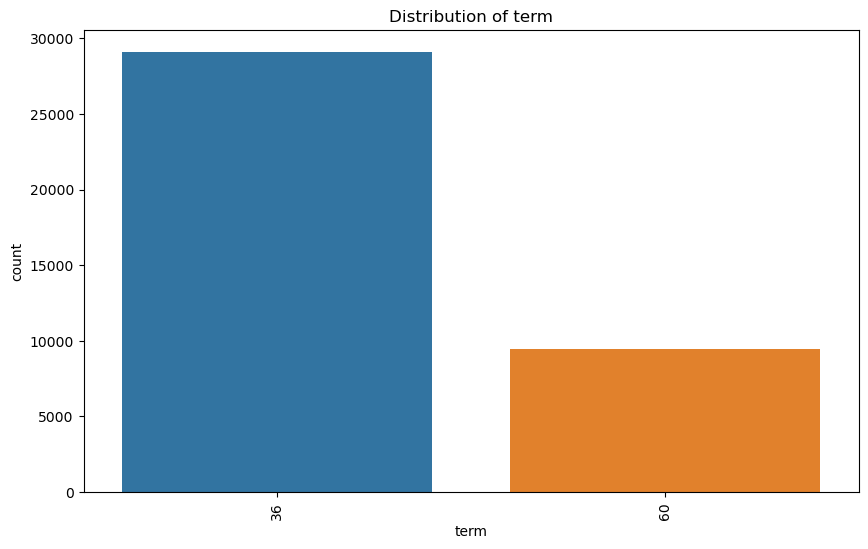

Value counts for grade:
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64



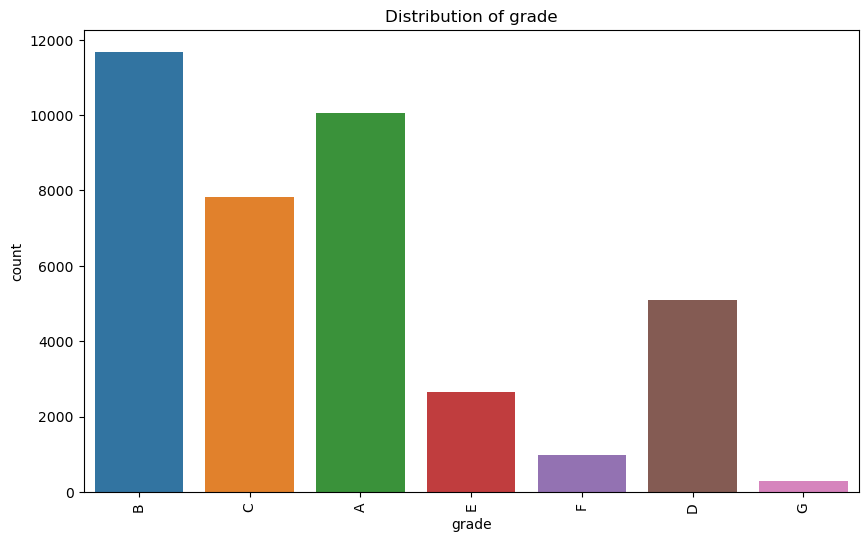

Value counts for sub_grade:
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64



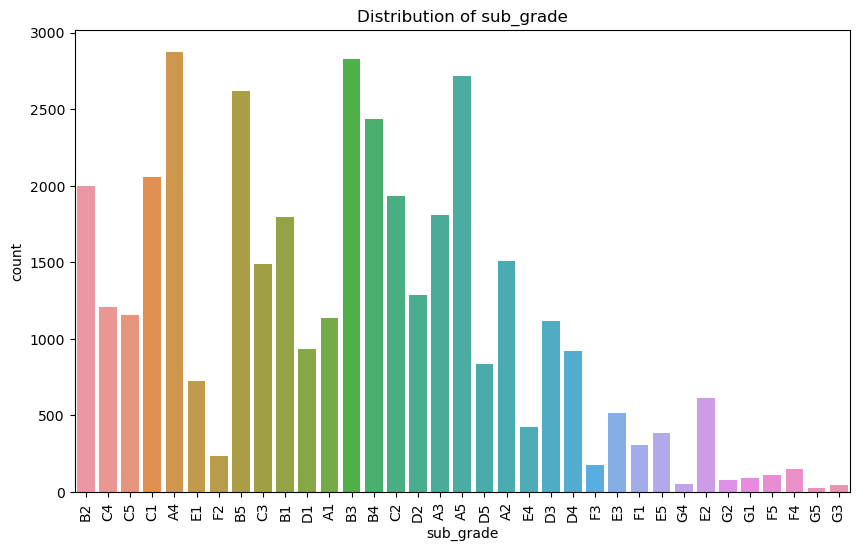

Value counts for home_ownership:
RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64



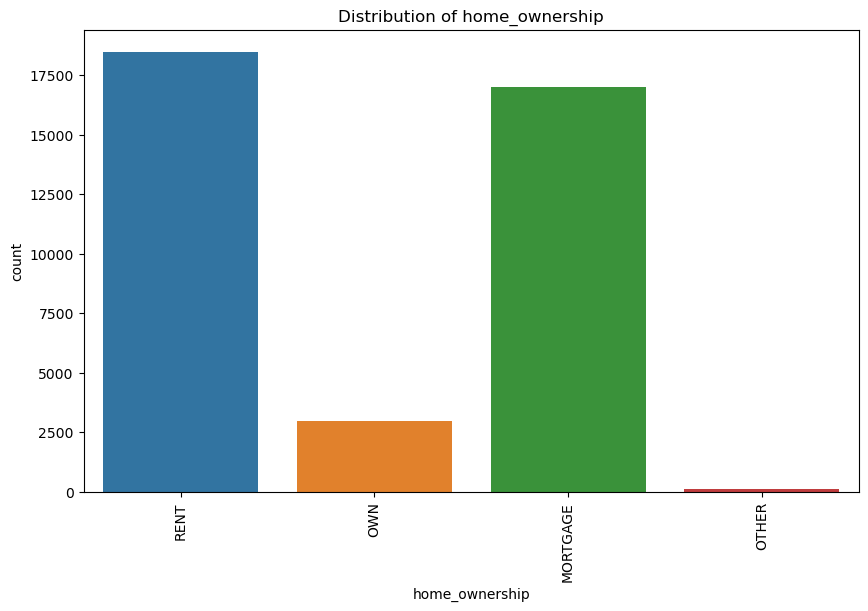

Value counts for verification_status:
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64



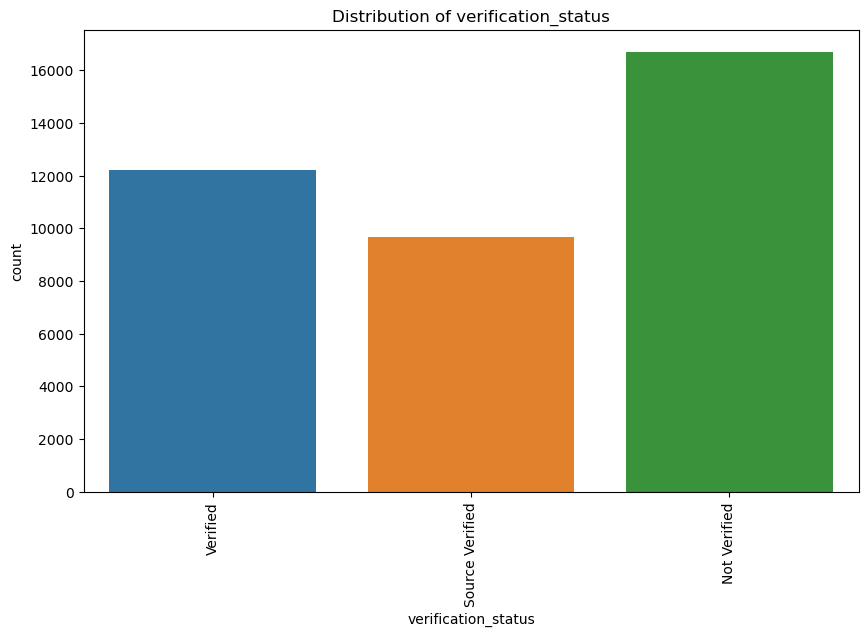

Value counts for loan_status:
Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64



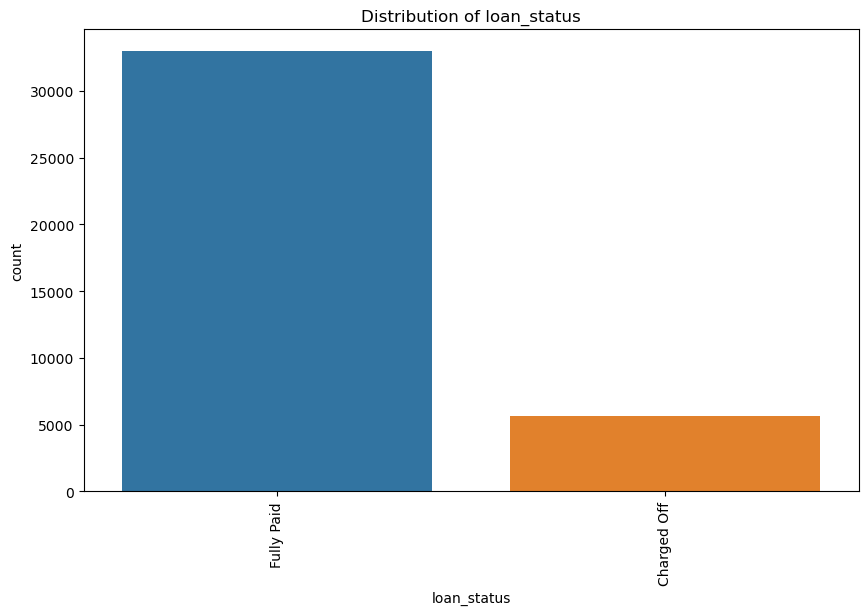

Value counts for purpose:
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64



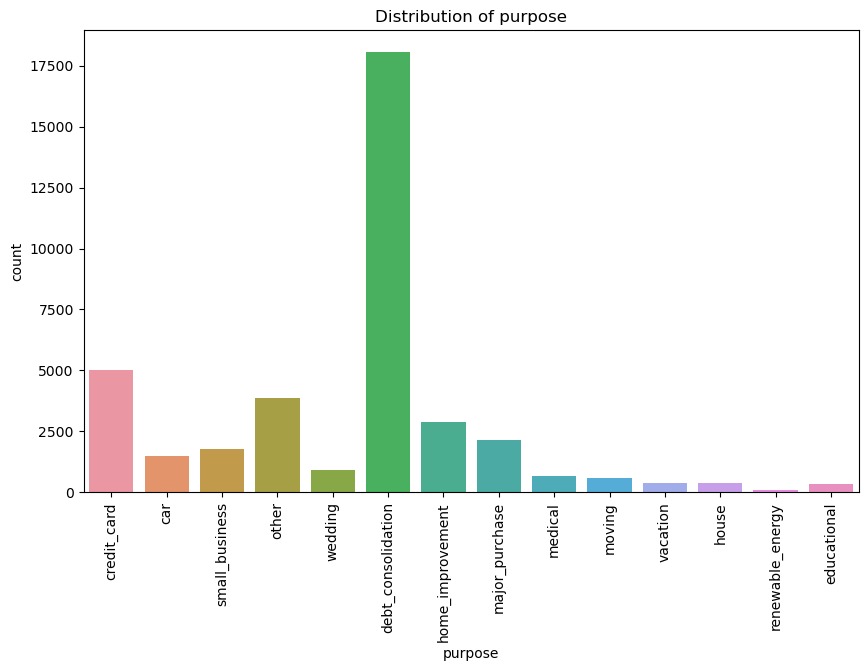

Value counts for addr_state:
CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64



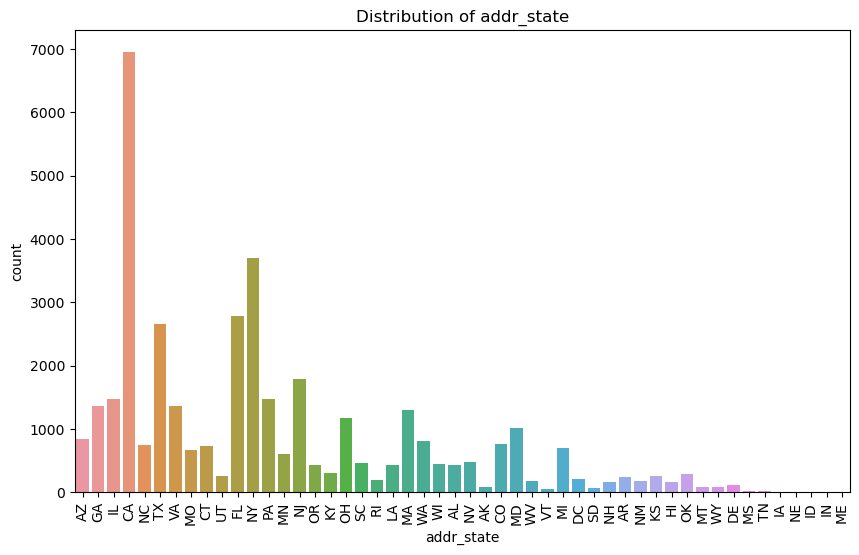

Value counts for delinq_2yrs:
0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64



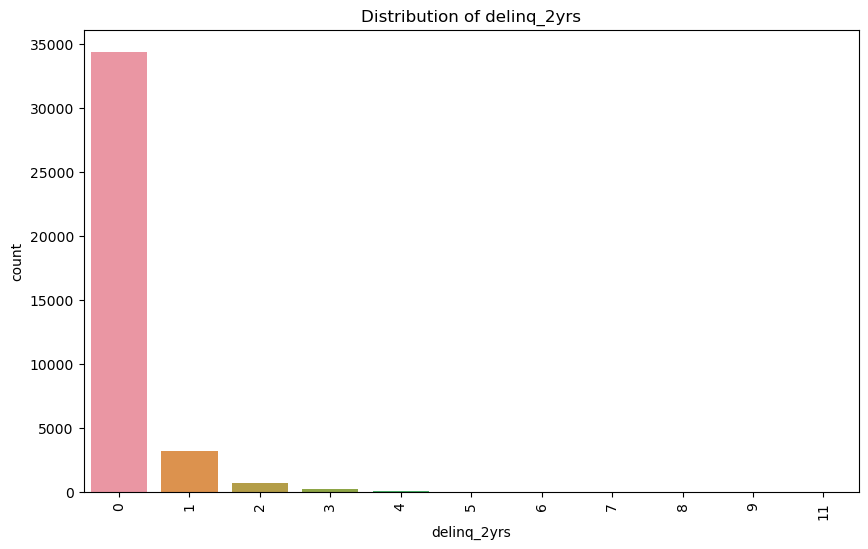

Value counts for inq_last_6mths:
0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64



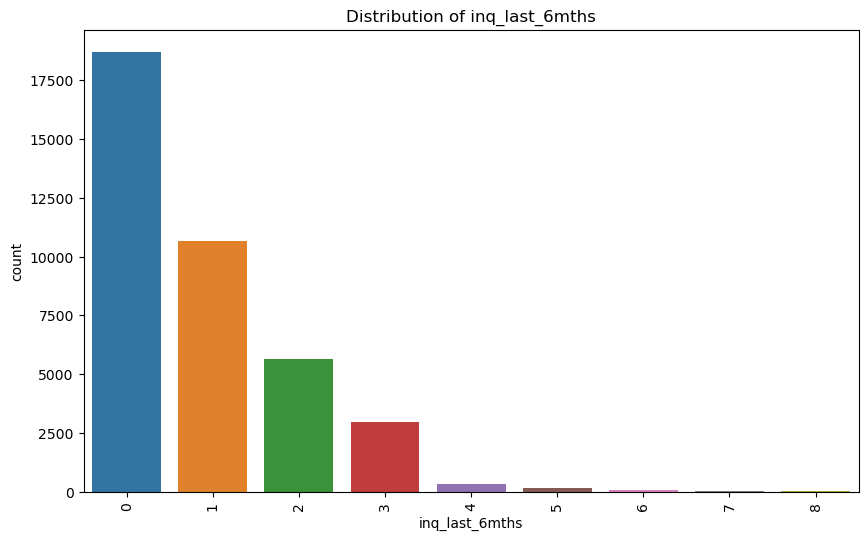

Value counts for pub_rec:
0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64



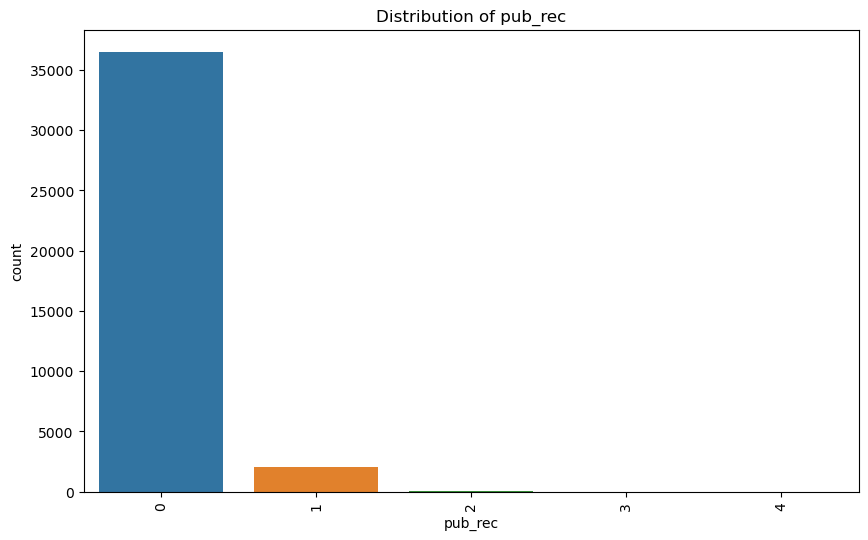

Value counts for pub_rec_bankruptcies:
0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64



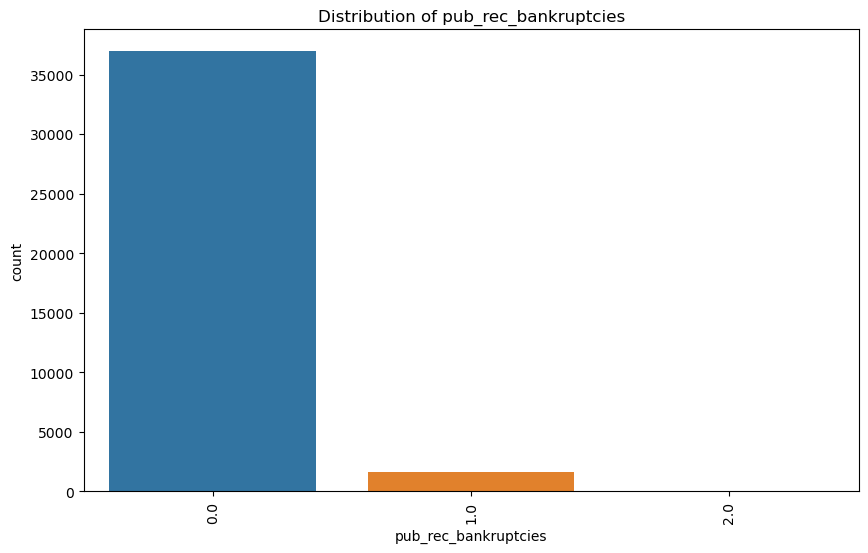

Value counts for issue_year:
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_year, dtype: int64



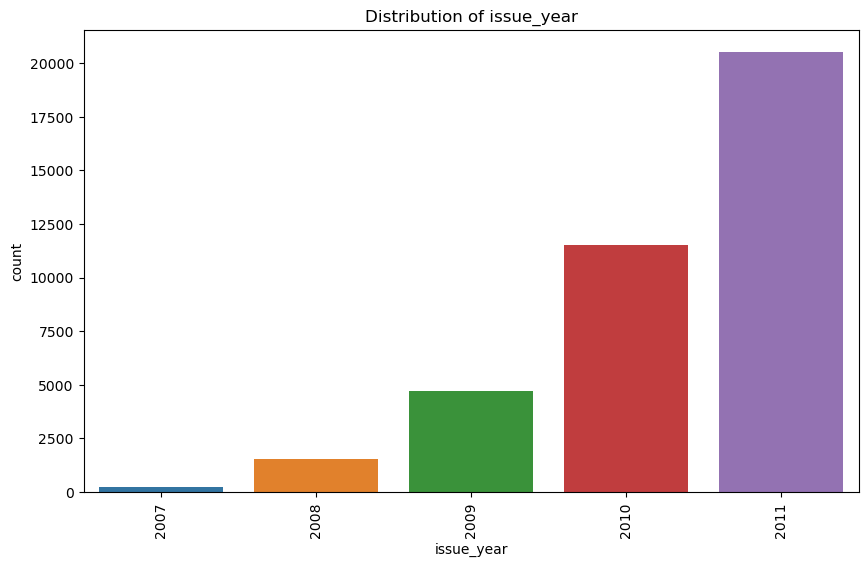

Value counts for issue_month:
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_month, dtype: int64



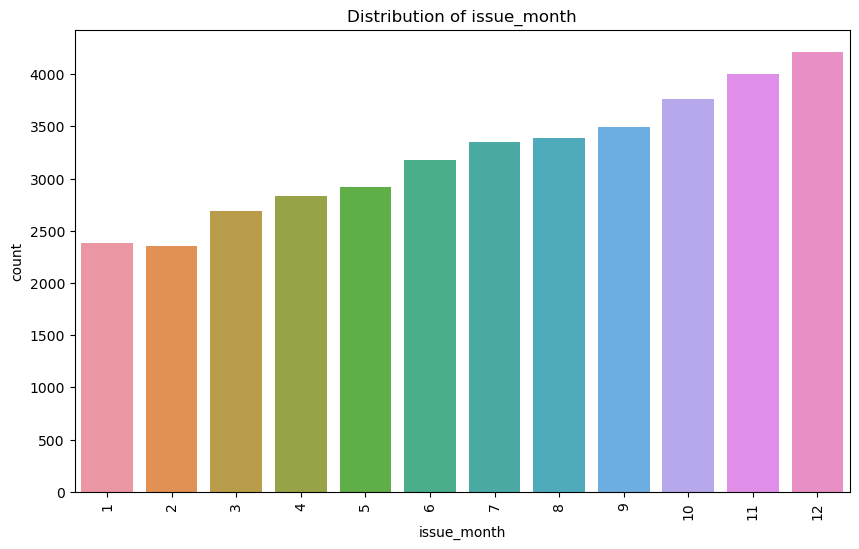

In [61]:
# Univariate analysis for each categorical column
for col in categorical_columns:
    # Calculate value counts
    value_counts = loan_data[col].value_counts()
    
    # Print value counts (optional)
    print(f"Value counts for {col}:")
    print(value_counts)
    print()
    
    # Plot a bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loan_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

###  Univariate analysis on numerical columns

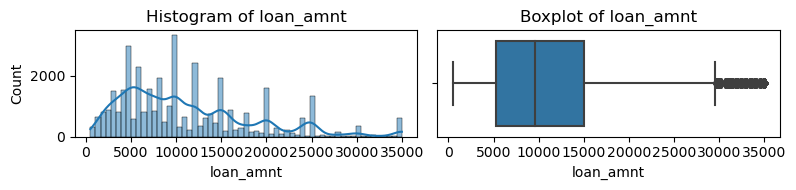

Summary Statistics for loan_amnt:
count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64




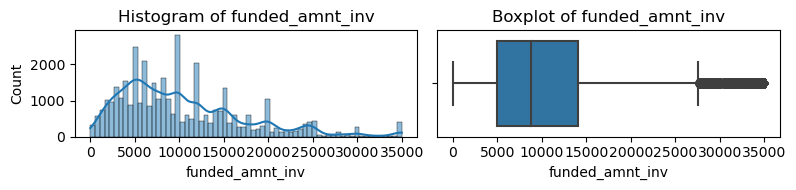

Summary Statistics for funded_amnt_inv:
count    38577.000000
mean     10222.481133
std       7022.720647
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64




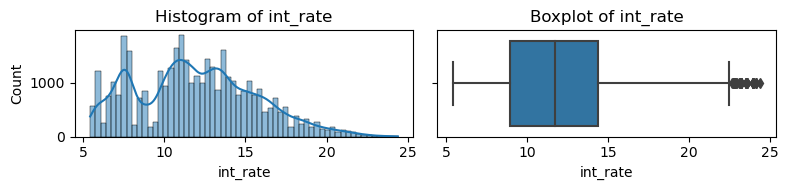

Summary Statistics for int_rate:
count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64




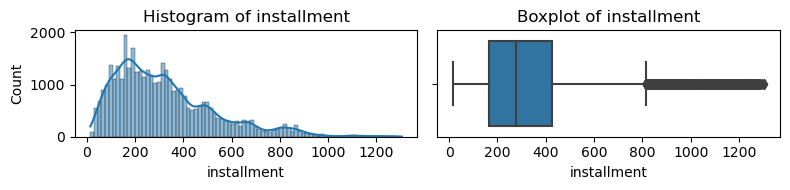

Summary Statistics for installment:
count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64




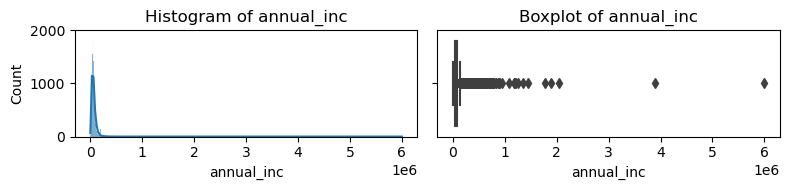

Summary Statistics for annual_inc:
count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




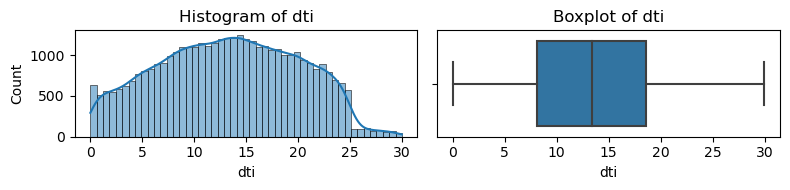

Summary Statistics for dti:
count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64




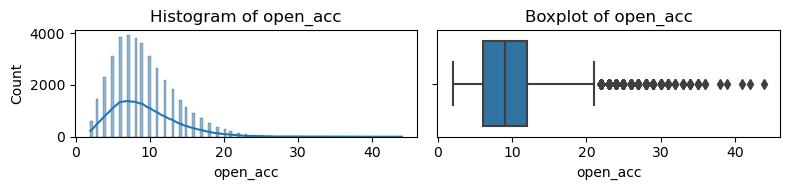

Summary Statistics for open_acc:
count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64




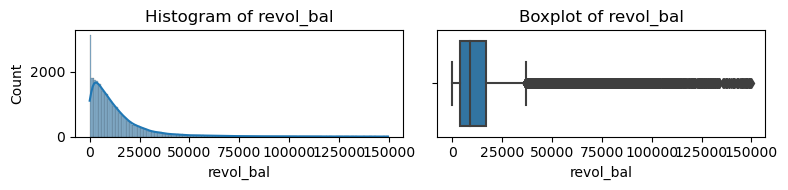

Summary Statistics for revol_bal:
count     38577.000000
mean      13289.489826
std       15866.492241
min           0.000000
25%        3650.000000
50%        8762.000000
75%       16912.000000
max      149588.000000
Name: revol_bal, dtype: float64




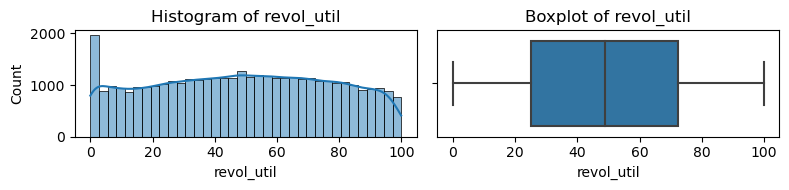

Summary Statistics for revol_util:
count    38577.000000
mean        48.702777
std         28.346353
min          0.000000
25%         25.200000
50%         49.000000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64




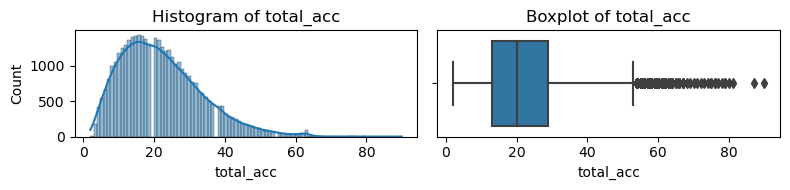

Summary Statistics for total_acc:
count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64




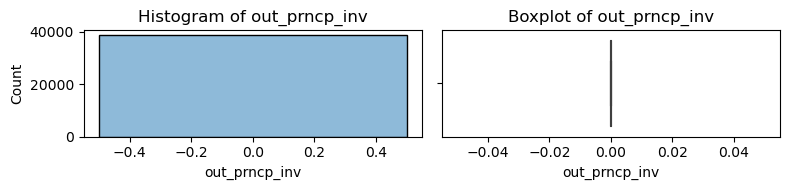

Summary Statistics for out_prncp_inv:
count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64




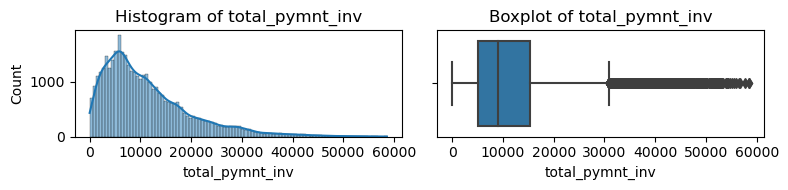

Summary Statistics for total_pymnt_inv:
count    38577.000000
mean     11271.196153
std       8700.845592
min          0.000000
25%       5019.590000
50%       9066.660000
75%      15329.780000
max      58563.680000
Name: total_pymnt_inv, dtype: float64




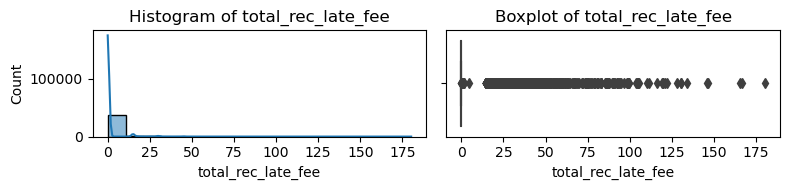

Summary Statistics for total_rec_late_fee:
count    38577.000000
mean         1.368634
std          7.315880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64




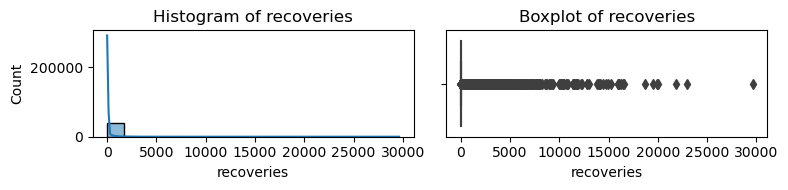

Summary Statistics for recoveries:
count    38577.000000
mean        98.035545
std        698.650182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64




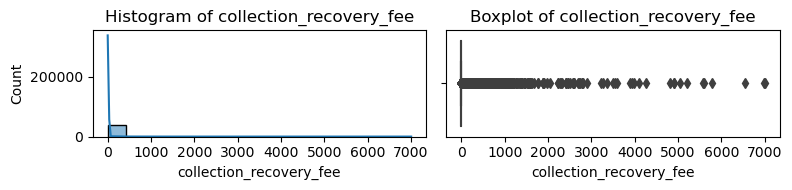

Summary Statistics for collection_recovery_fee:
count    38577.000000
mean        12.772728
std        150.836853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64




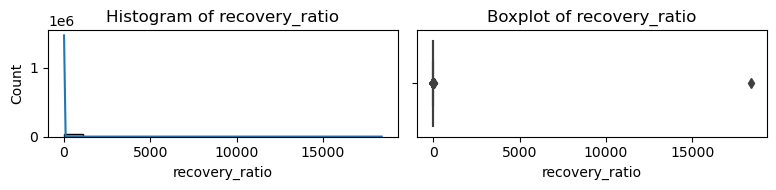

Summary Statistics for recovery_ratio:
count    38577.000000
mean         0.487928
std         93.635821
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      18391.000000
Name: recovery_ratio, dtype: float64




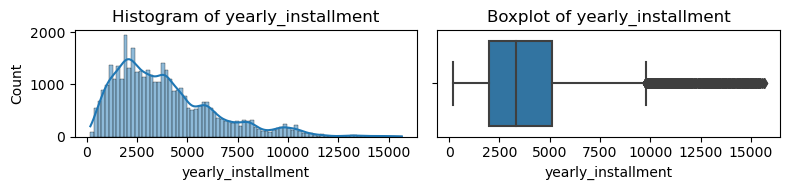

Summary Statistics for yearly_installment:
count    38577.000000
mean      3869.595816
std       2503.670574
min        188.280000
25%       1988.880000
50%       3334.320000
75%       5106.600000
max      15662.280000
Name: yearly_installment, dtype: float64




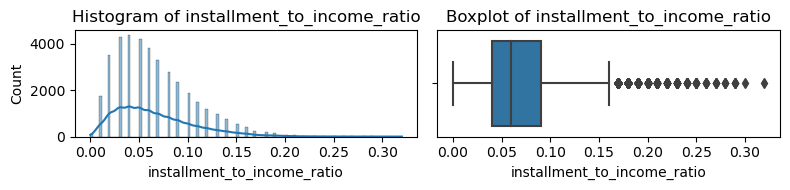

Summary Statistics for installment_to_income_ratio:
count    38577.000000
mean         0.065611
std          0.040177
min          0.000000
25%          0.040000
50%          0.060000
75%          0.090000
max          0.320000
Name: installment_to_income_ratio, dtype: float64




In [62]:
# Loop through each numeric column and perform univariate analysis
for column in numerical_columns:
    
    # Plot histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(8, 2))

    # Histogram
    sns.histplot(loan_data[column], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram of {column}")  # Set title for histogram plot

    # Boxplot
    sns.boxplot(x=loan_data[column], ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")  # Set title for boxplot

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Summary Statistics for {column}:")
    summary_stats = loan_data[column].describe()
    print(summary_stats)
    print("\n")

In [63]:
numerical_data=loan_data[numerical_columns]

In [64]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    outlier_columns = []
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if df[(df[column] < lower_bound) | (df[column] > upper_bound)].any().any():
            outlier_columns.append(column)
    return outlier_columns

# Assuming df is your DataFrame
outlier_columns = detect_outliers(numerical_data)

# Print the list of columns with outliers
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'recovery_ratio', 'yearly_installment', 'installment_to_income_ratio']


In [65]:
def remove_outliers(df, outlier_columns):
    for column in outlier_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [66]:
loan_data=remove_outliers(loan_data, outlier_columns)

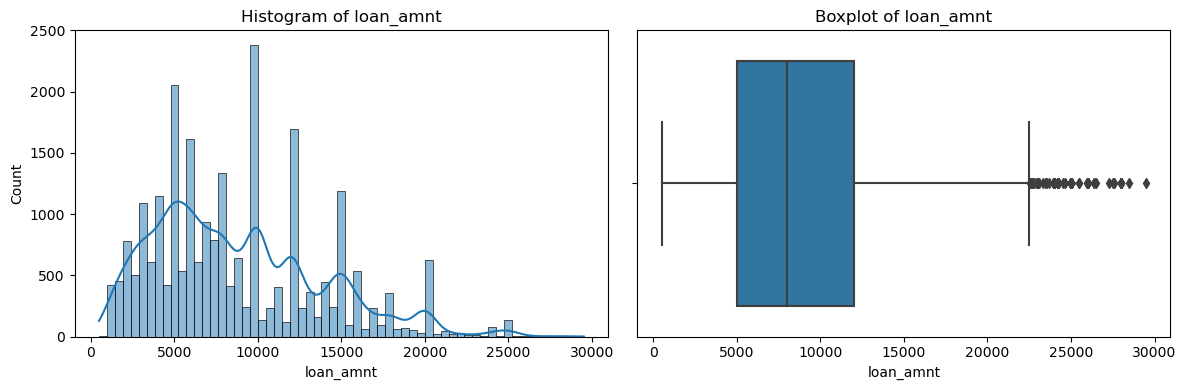

Summary Statistics for loan_amnt:
count    24803.000000
mean      8764.605088
std       5025.452446
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      29500.000000
Name: loan_amnt, dtype: float64




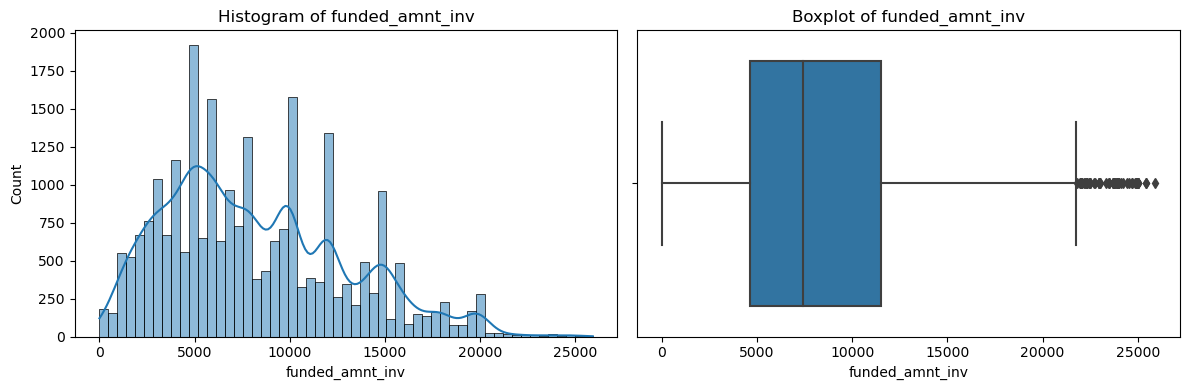

Summary Statistics for funded_amnt_inv:
count    24803.000000
mean      8165.533275
std       4731.706864
min          0.000000
25%       4619.575000
50%       7400.000000
75%      11500.000000
max      25925.000000
Name: funded_amnt_inv, dtype: float64




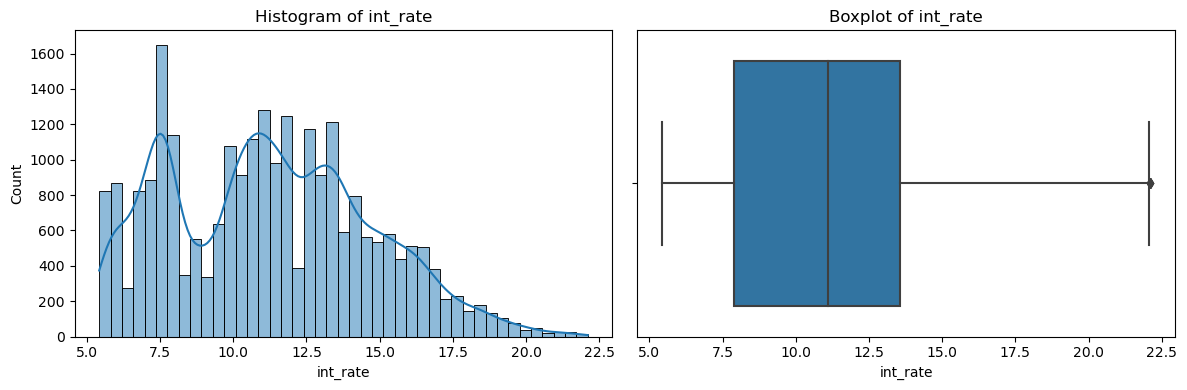

Summary Statistics for int_rate:
count    24803.000000
mean        11.252042
std          3.431130
min          5.420000
25%          7.900000
50%         11.110000
75%         13.570000
max         22.110000
Name: int_rate, dtype: float64




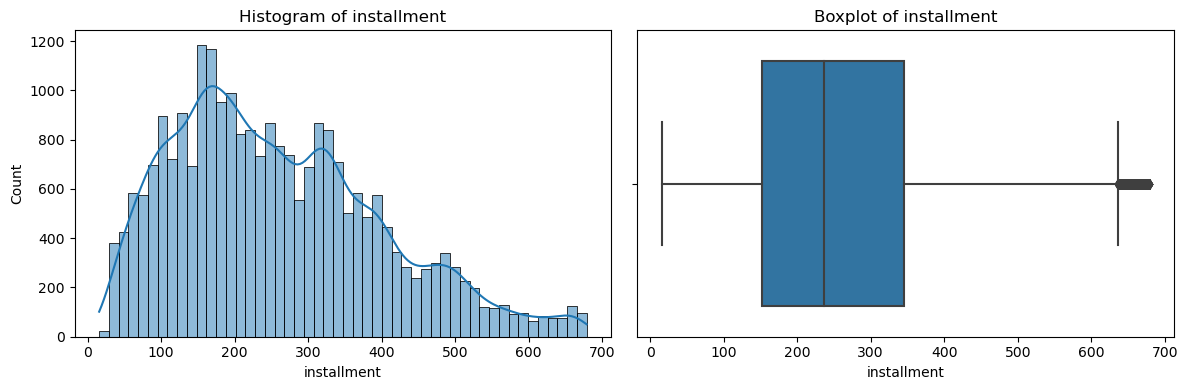

Summary Statistics for installment:
count    24803.000000
mean       258.657715
std        140.935489
min         15.690000
25%        152.180000
50%        236.960000
75%        345.820000
max        678.610000
Name: installment, dtype: float64




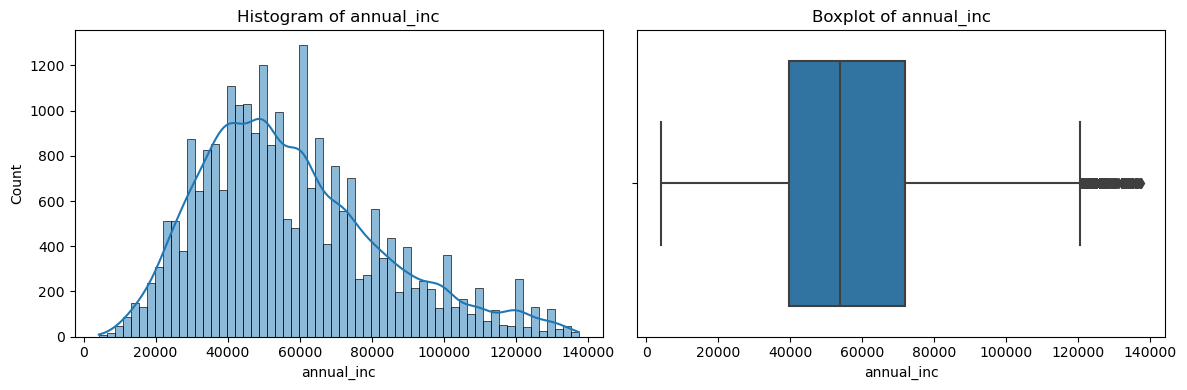

Summary Statistics for annual_inc:
count     24803.000000
mean      57527.709153
std       25173.604272
min        4200.000000
25%       39600.000000
50%       53684.000000
75%       72000.000000
max      137481.000000
Name: annual_inc, dtype: float64




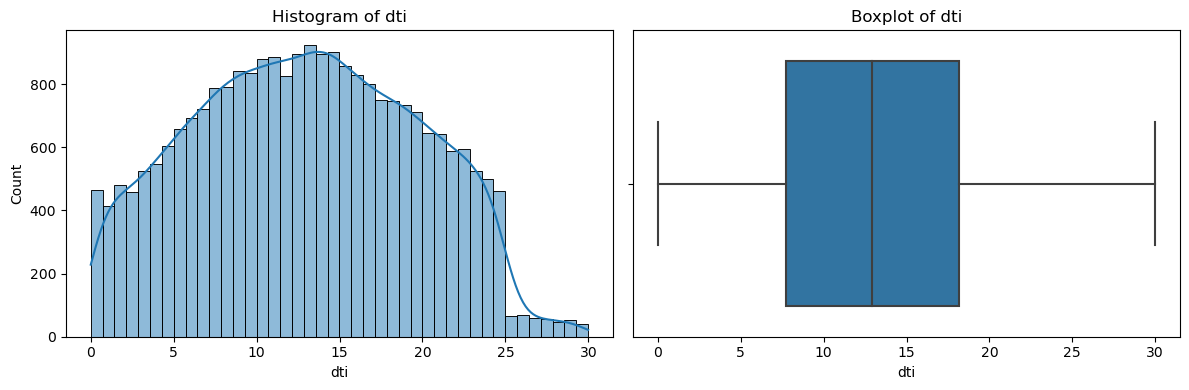

Summary Statistics for dti:
count    24803.000000
mean        12.937897
std          6.687435
min          0.000000
25%          7.740000
50%         12.920000
75%         18.160000
max         29.990000
Name: dti, dtype: float64




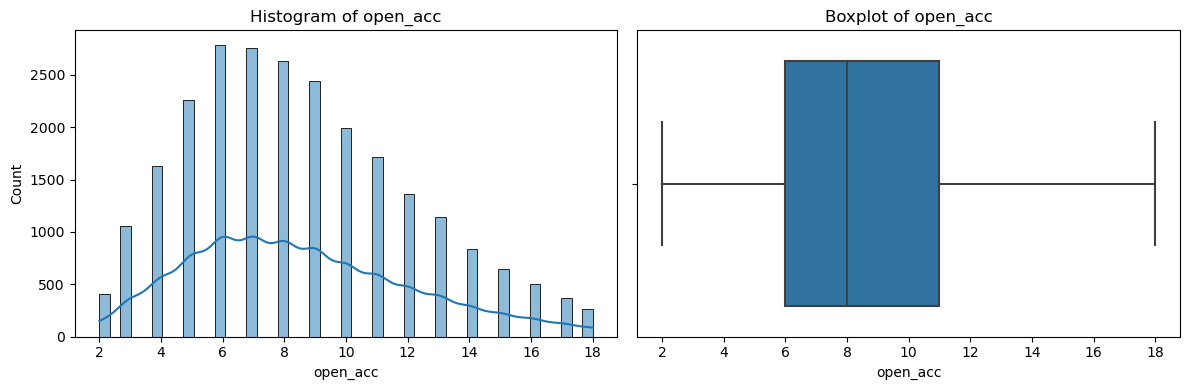

Summary Statistics for open_acc:
count    24803.000000
mean         8.518728
std          3.598746
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         18.000000
Name: open_acc, dtype: float64




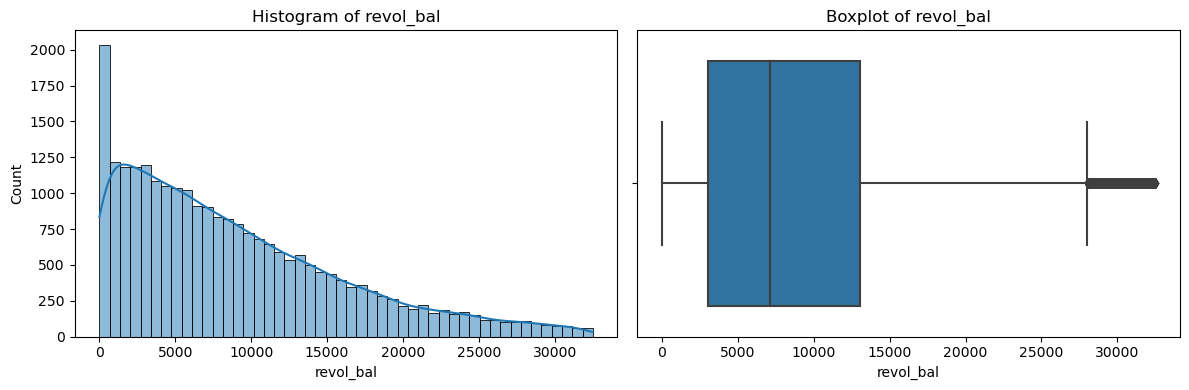

Summary Statistics for revol_bal:
count    24803.00000
mean      8873.27154
std       7305.77474
min          0.00000
25%       3035.50000
50%       7140.00000
75%      13040.00000
max      32508.00000
Name: revol_bal, dtype: float64




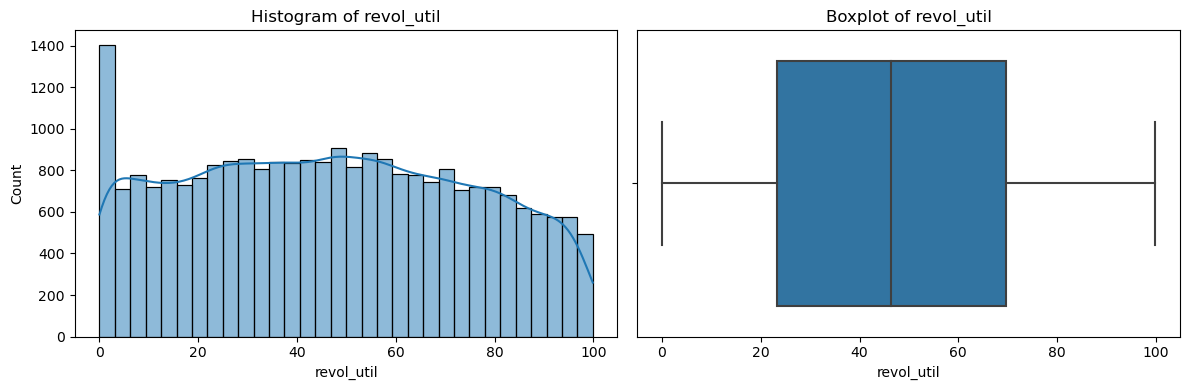

Summary Statistics for revol_util:
count    24803.000000
mean        46.643667
std         28.130822
min          0.000000
25%         23.200000
50%         46.400000
75%         69.700000
max         99.900000
Name: revol_util, dtype: float64




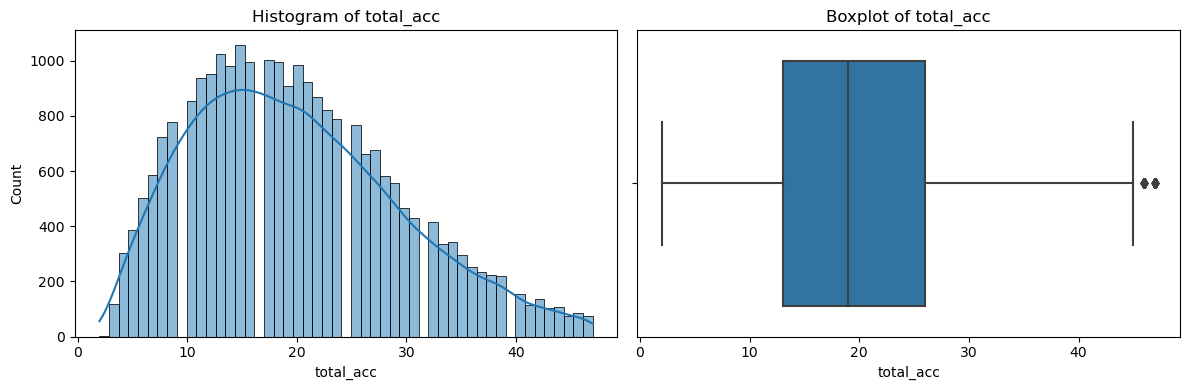

Summary Statistics for total_acc:
count    24803.000000
mean        19.876870
std          9.485447
min          2.000000
25%         13.000000
50%         19.000000
75%         26.000000
max         47.000000
Name: total_acc, dtype: float64




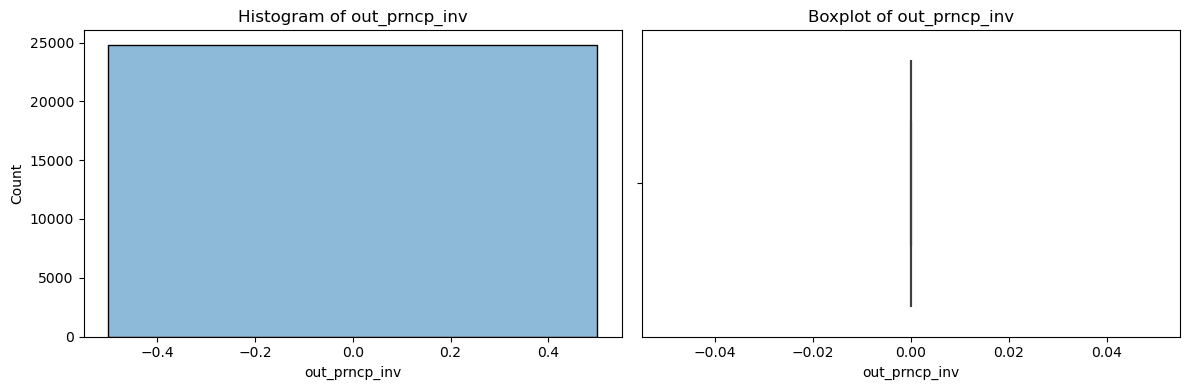

Summary Statistics for out_prncp_inv:
count    24803.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64




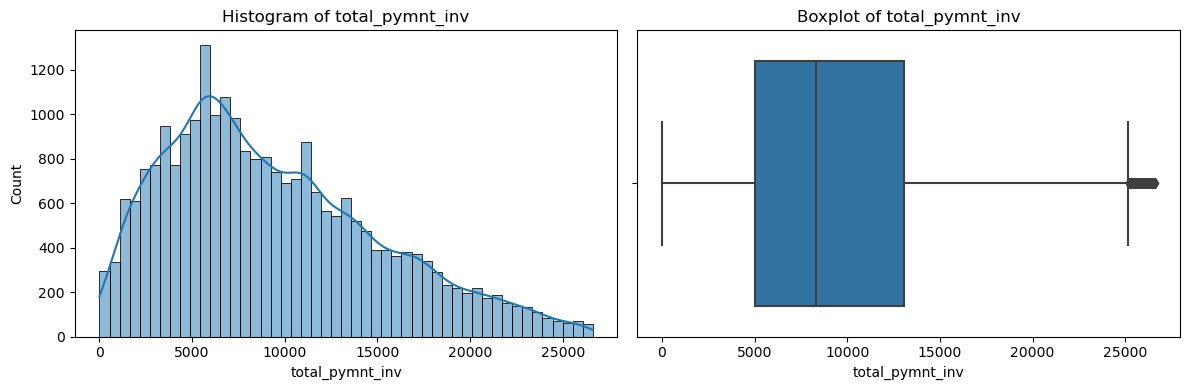

Summary Statistics for total_pymnt_inv:
count    24803.000000
mean      9376.143182
std       5770.516220
min          0.000000
25%       5001.220000
50%       8289.940000
75%      13068.970000
max      26624.380000
Name: total_pymnt_inv, dtype: float64




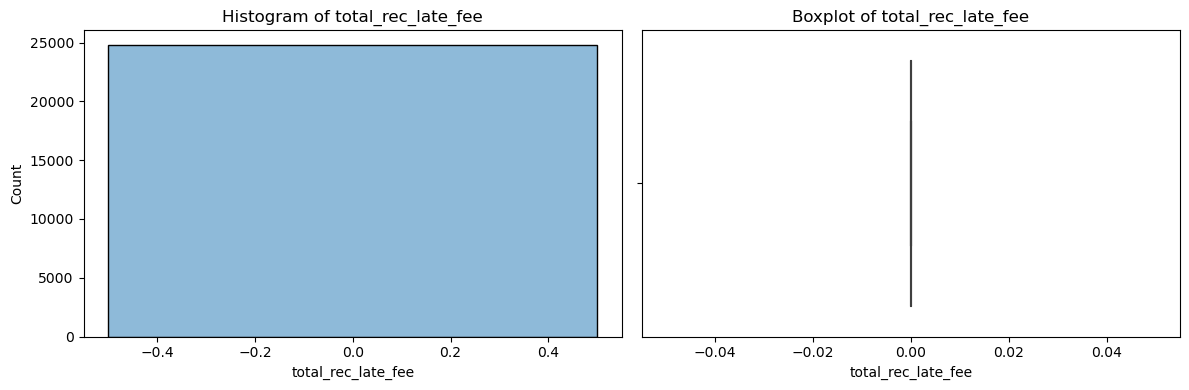

Summary Statistics for total_rec_late_fee:
count    24803.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: total_rec_late_fee, dtype: float64




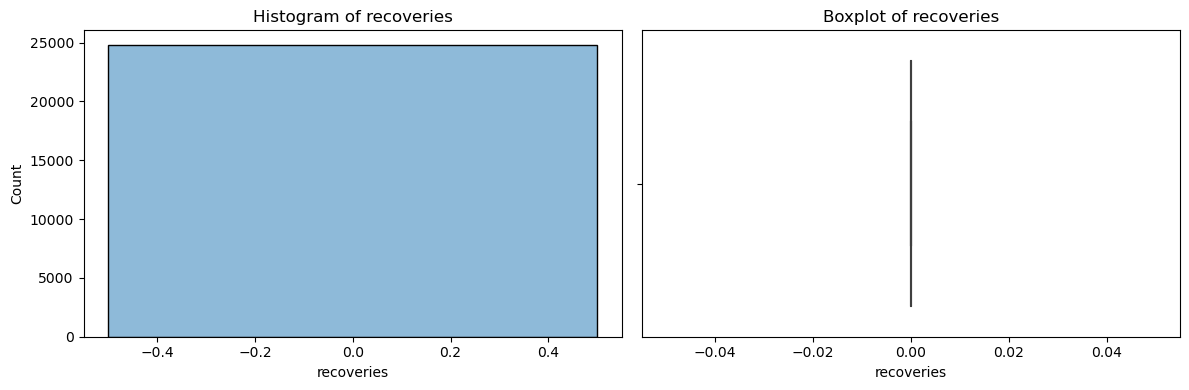

Summary Statistics for recoveries:
count    24803.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: recoveries, dtype: float64




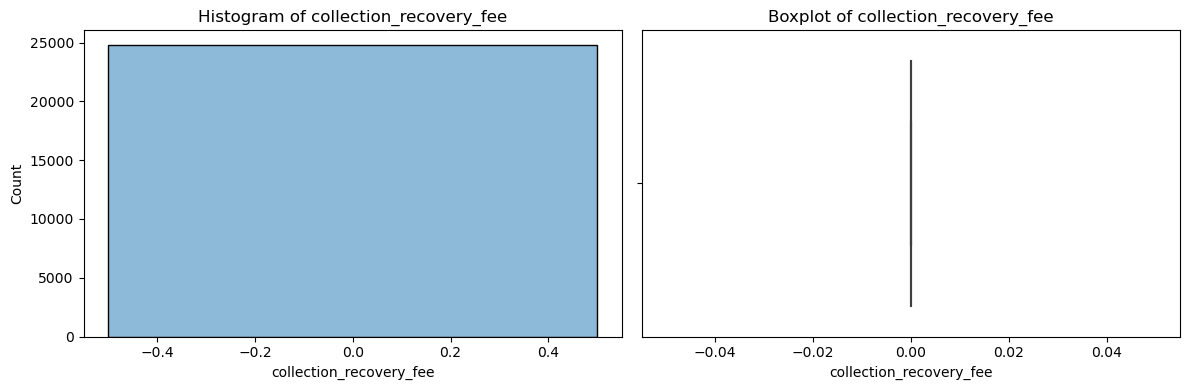

Summary Statistics for collection_recovery_fee:
count    24803.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collection_recovery_fee, dtype: float64




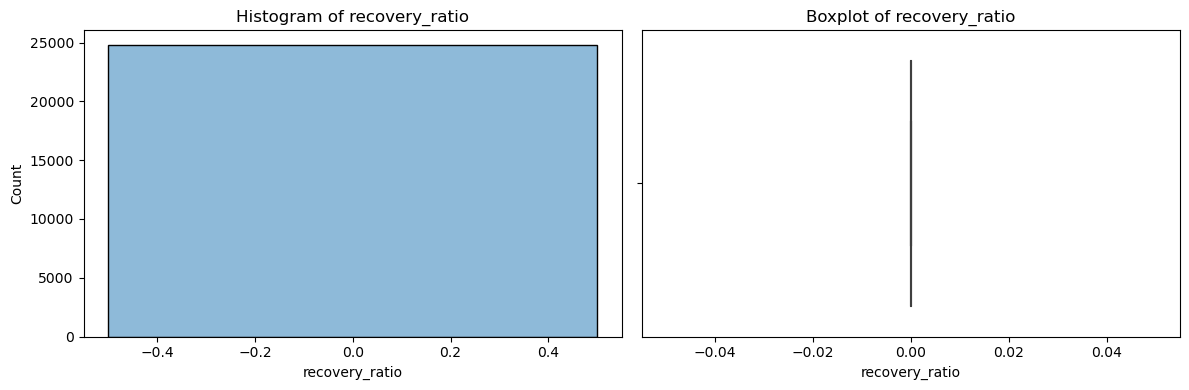

Summary Statistics for recovery_ratio:
count    24803.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: recovery_ratio, dtype: float64




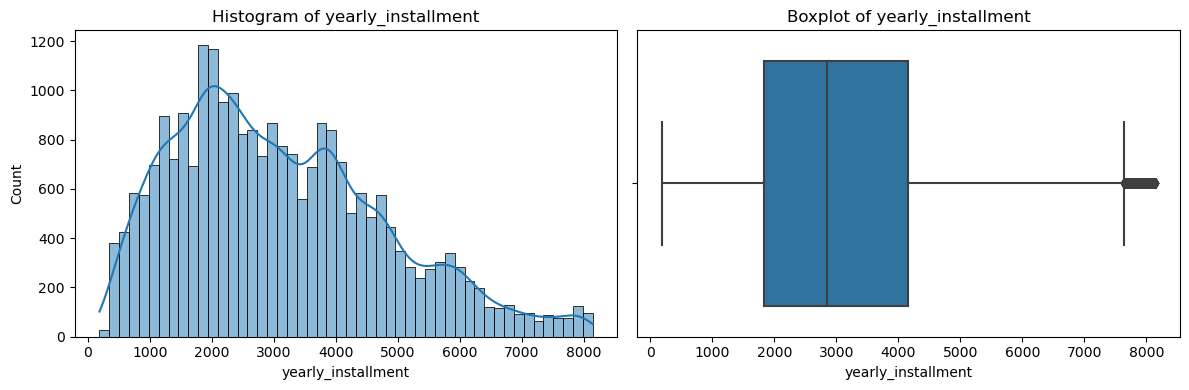

Summary Statistics for yearly_installment:
count    24803.000000
mean      3103.892578
std       1691.225871
min        188.280000
25%       1826.160000
50%       2843.520000
75%       4149.840000
max       8143.320000
Name: yearly_installment, dtype: float64




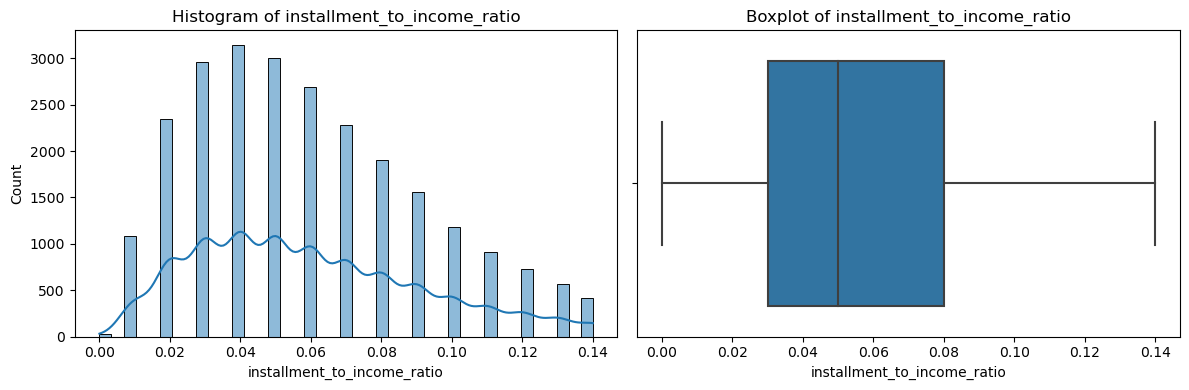

Summary Statistics for installment_to_income_ratio:
count    24803.000000
mean         0.059402
std          0.031984
min          0.000000
25%          0.030000
50%          0.050000
75%          0.080000
max          0.140000
Name: installment_to_income_ratio, dtype: float64




In [67]:
# Loop through each numeric column and perform univariate analysis
for column in numerical_columns:
    
    # Plot histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(loan_data[column], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram of {column}")  # Set title for histogram plot

    # Boxplot
    sns.boxplot(x=loan_data[column], ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")  # Set title for boxplot

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"Summary Statistics for {column}:")
    summary_stats = loan_data[column].describe()
    print(summary_stats)
    print("\n")

# Post-Outlier Analysis: Exploring Data Trends with Plots

In [68]:
def plot_histogram_and_boxplot(data, column_name):
    """
    Plot histogram, boxplot, and summary statistics for a given column in a DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to plot the histogram, boxplot, and summary statistics.
    """
    # Create a figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot histogram
    sns.histplot(data[column_name], ax=axes[0, 0], kde=True)
    axes[0, 0].set_title(f'Histogram of {column_name}')
    axes[0, 0].set_xlabel(column_name)

    # Plot boxplot
    sns.boxplot(x=data[column_name], ax=axes[0, 1])
    axes[0, 1].set_title(f'Boxplot of {column_name}')
    axes[0, 1].set_xlabel(column_name)

    # Plot summary statistics
    summary_stats = data[column_name].describe()
    summary_stats_str = '\n'.join([f'{stat}: {value}' for stat, value in summary_stats.items()])
    axes[1, 0].text(0.5, 0.5, summary_stats_str, fontsize=12, ha='center', va='center')
    axes[1, 0].axis('off')

    # Remove empty subplot
    fig.delaxes(axes[1, 1])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

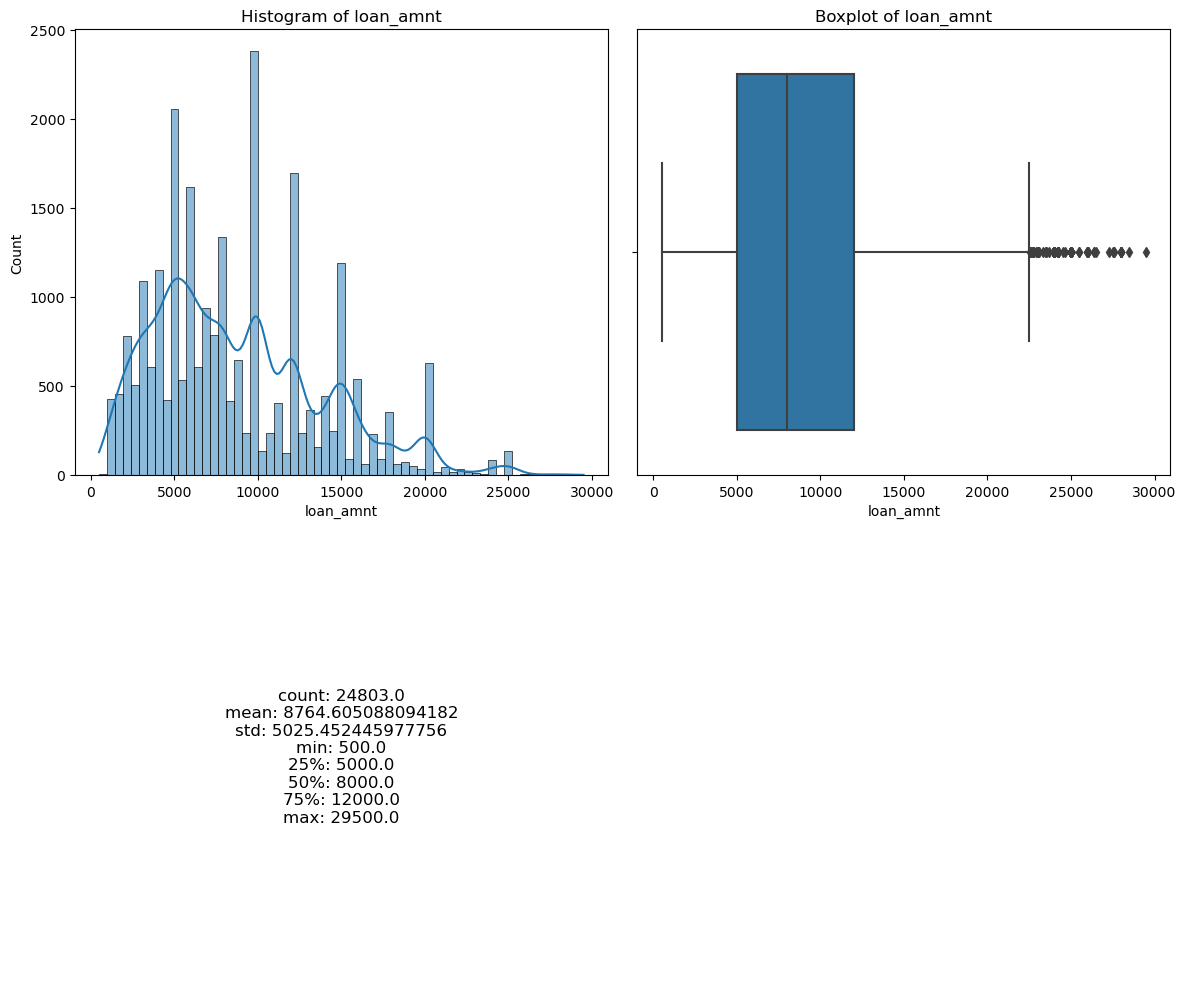

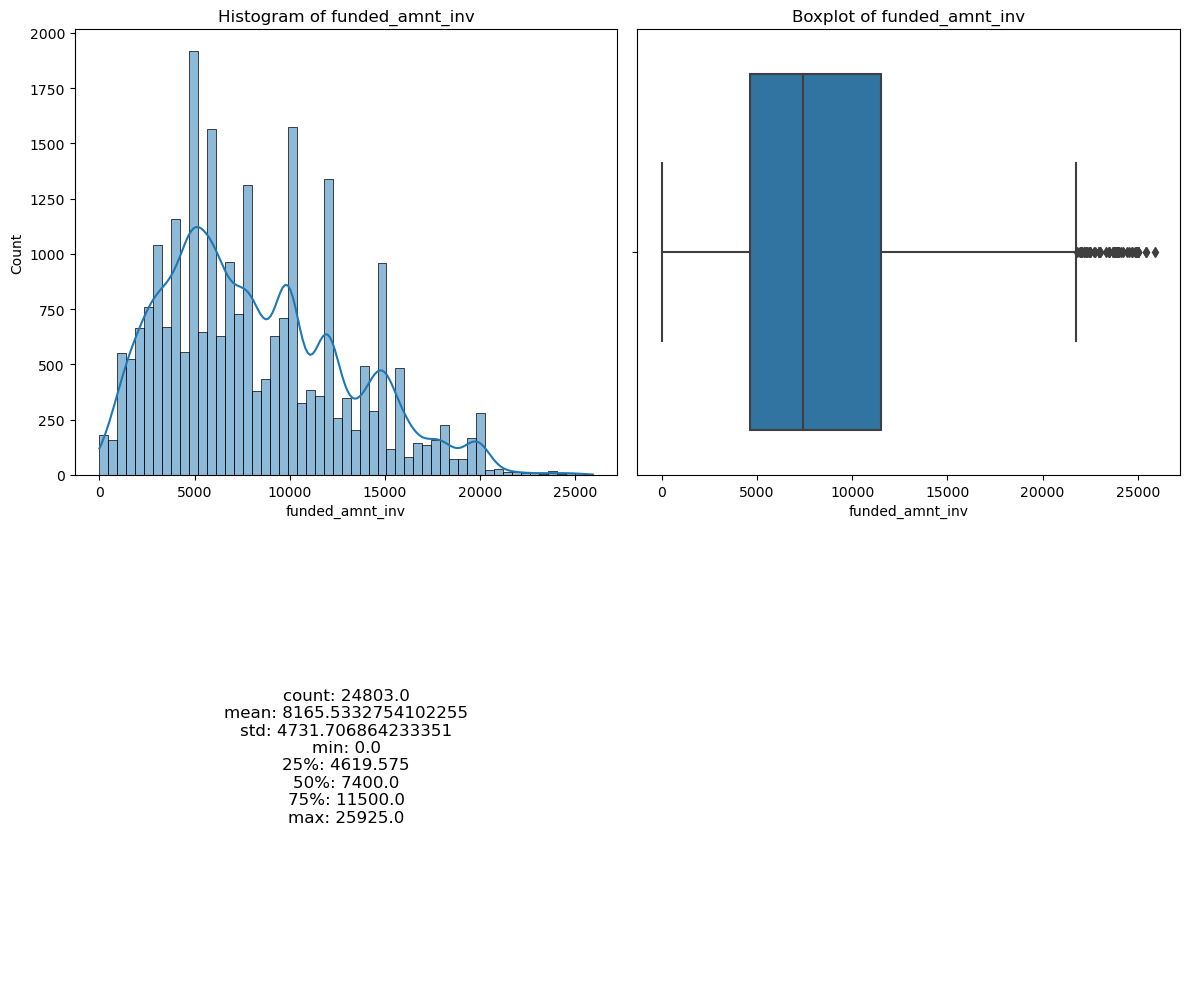

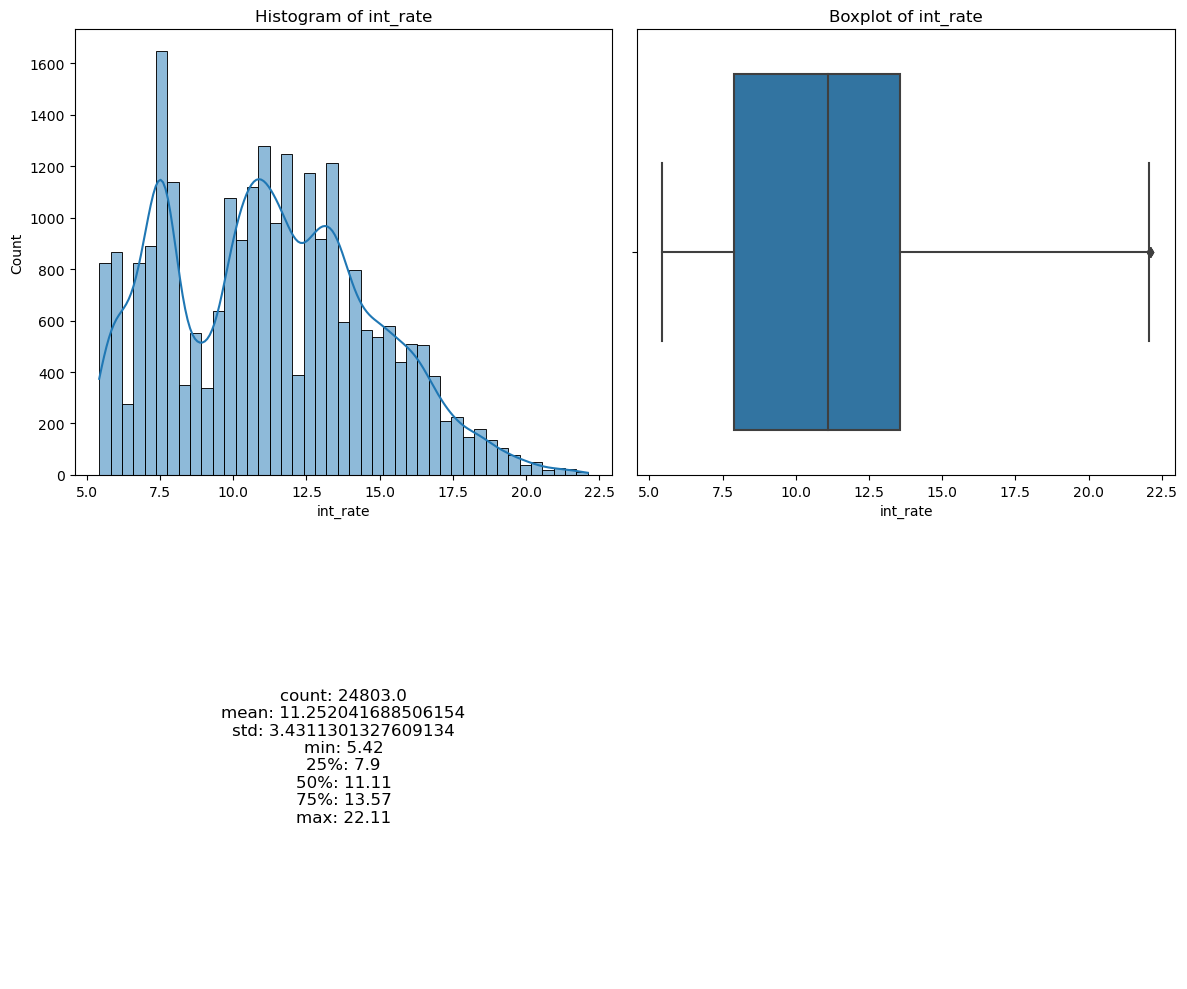

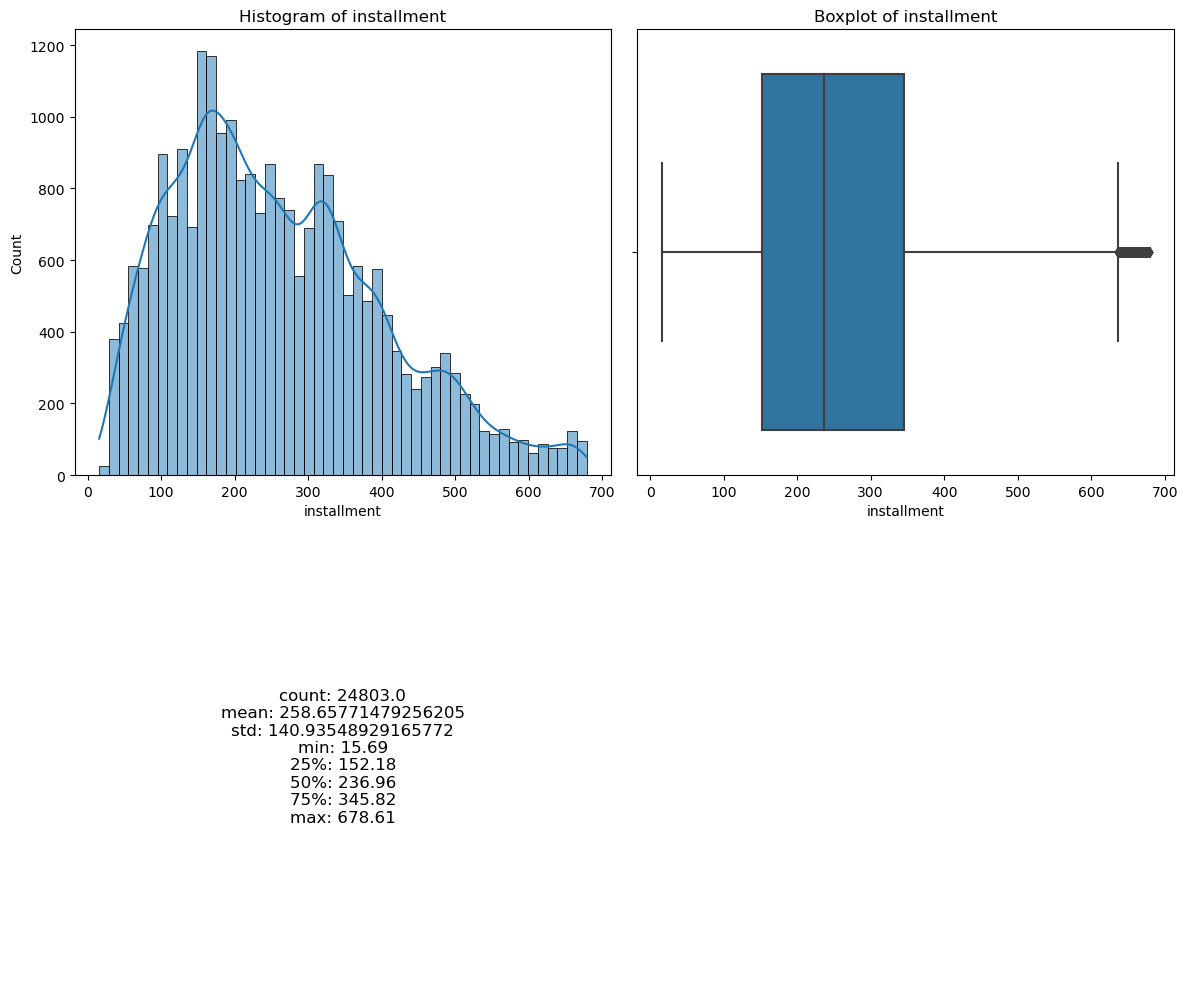

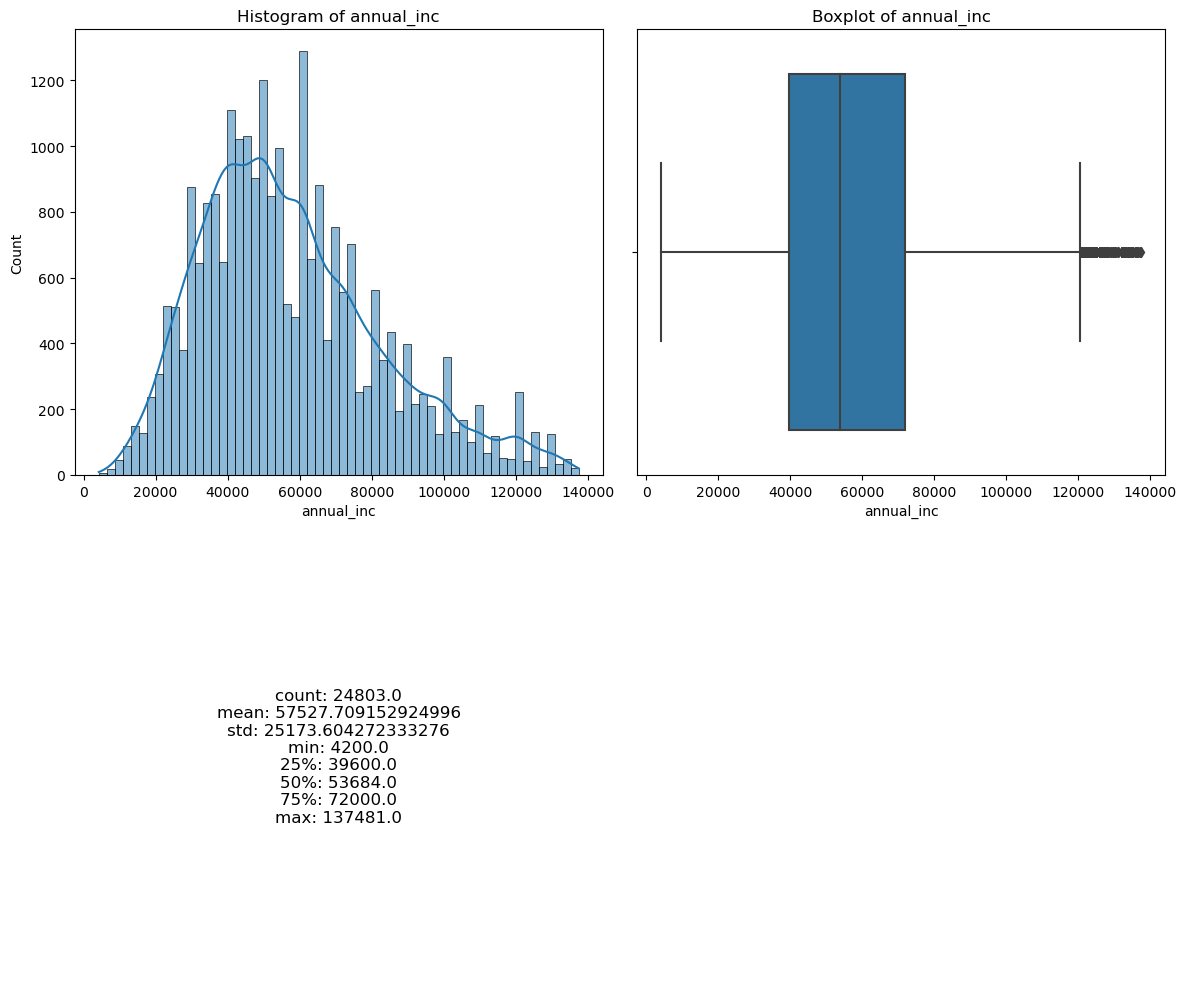

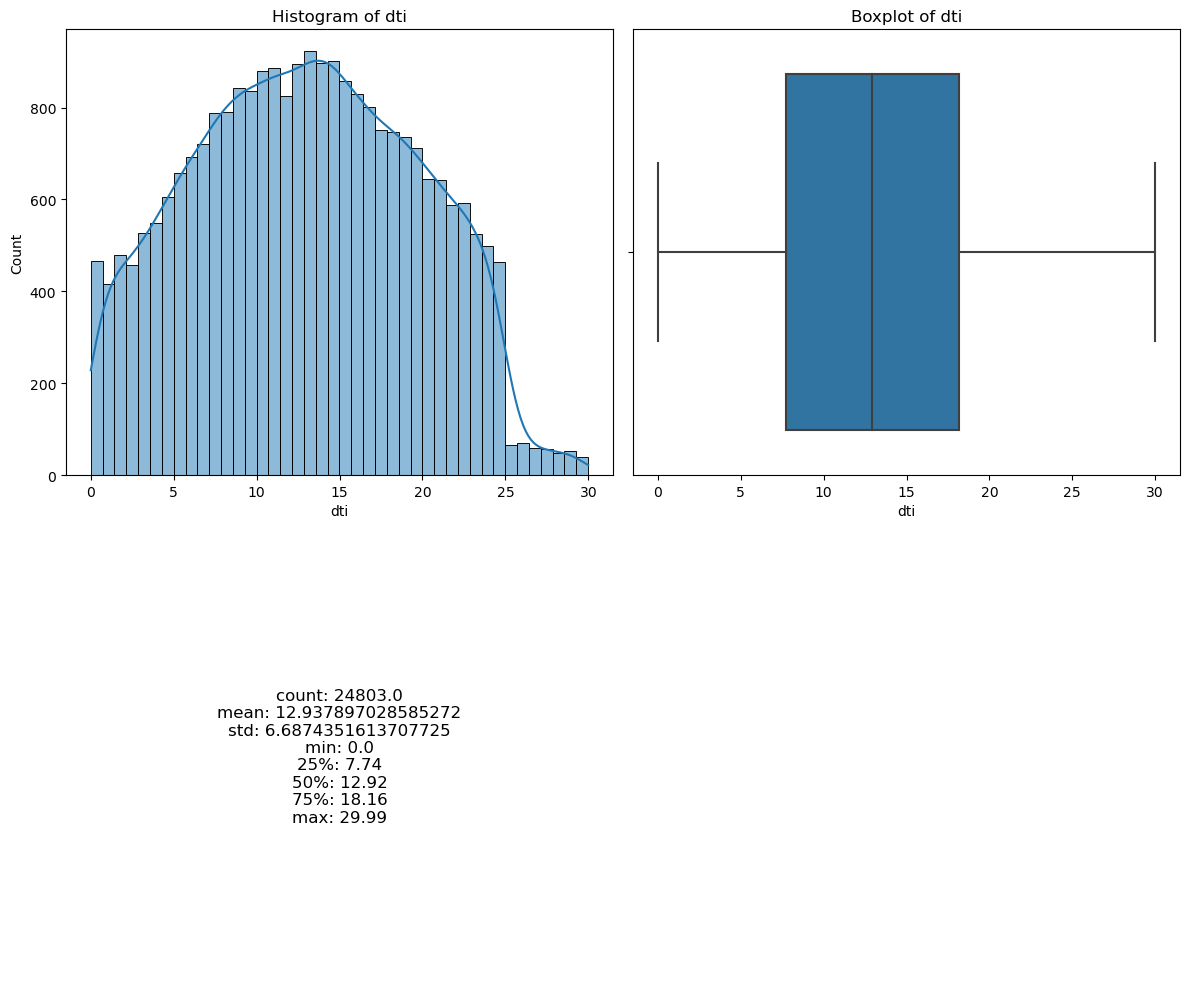

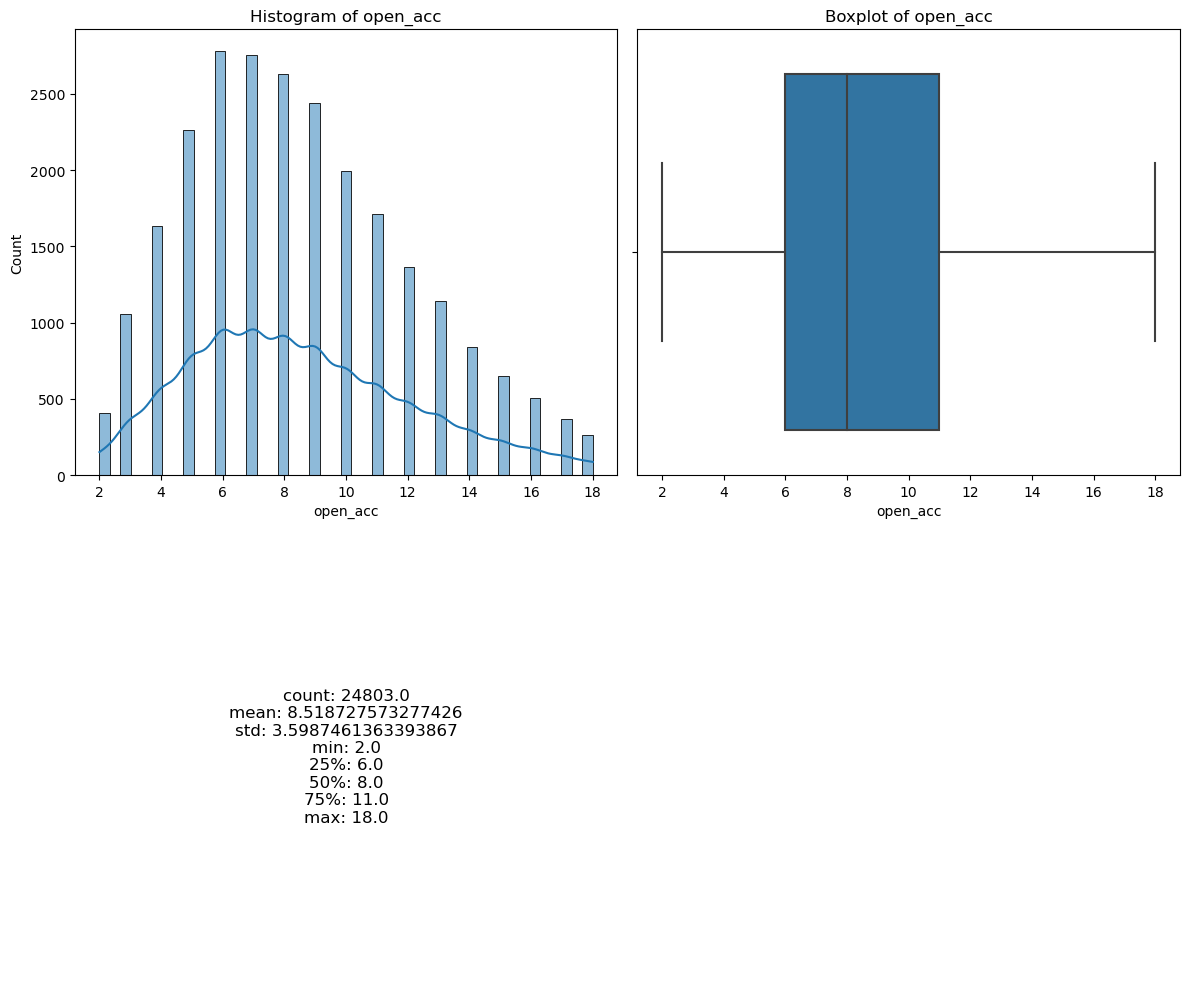

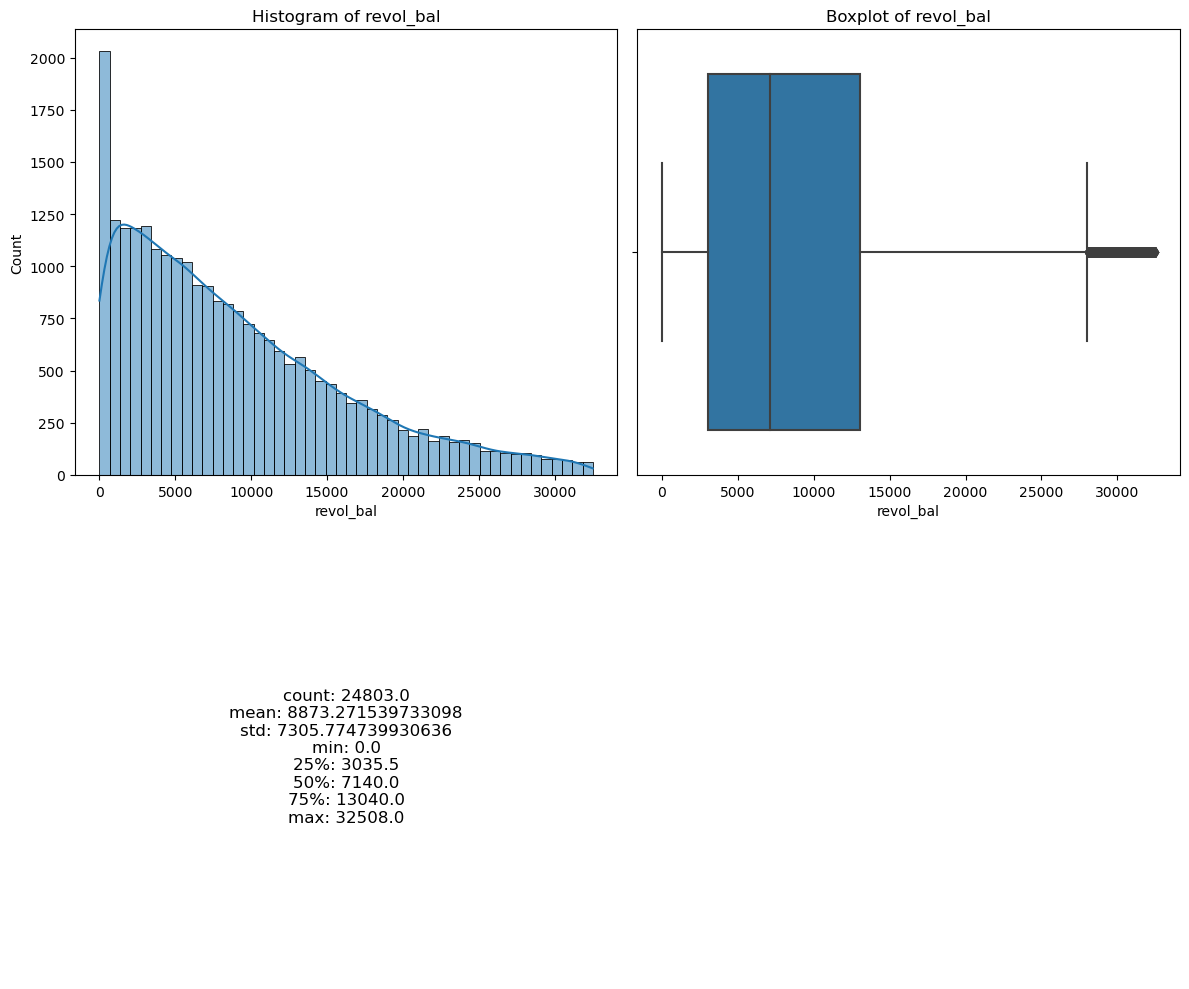

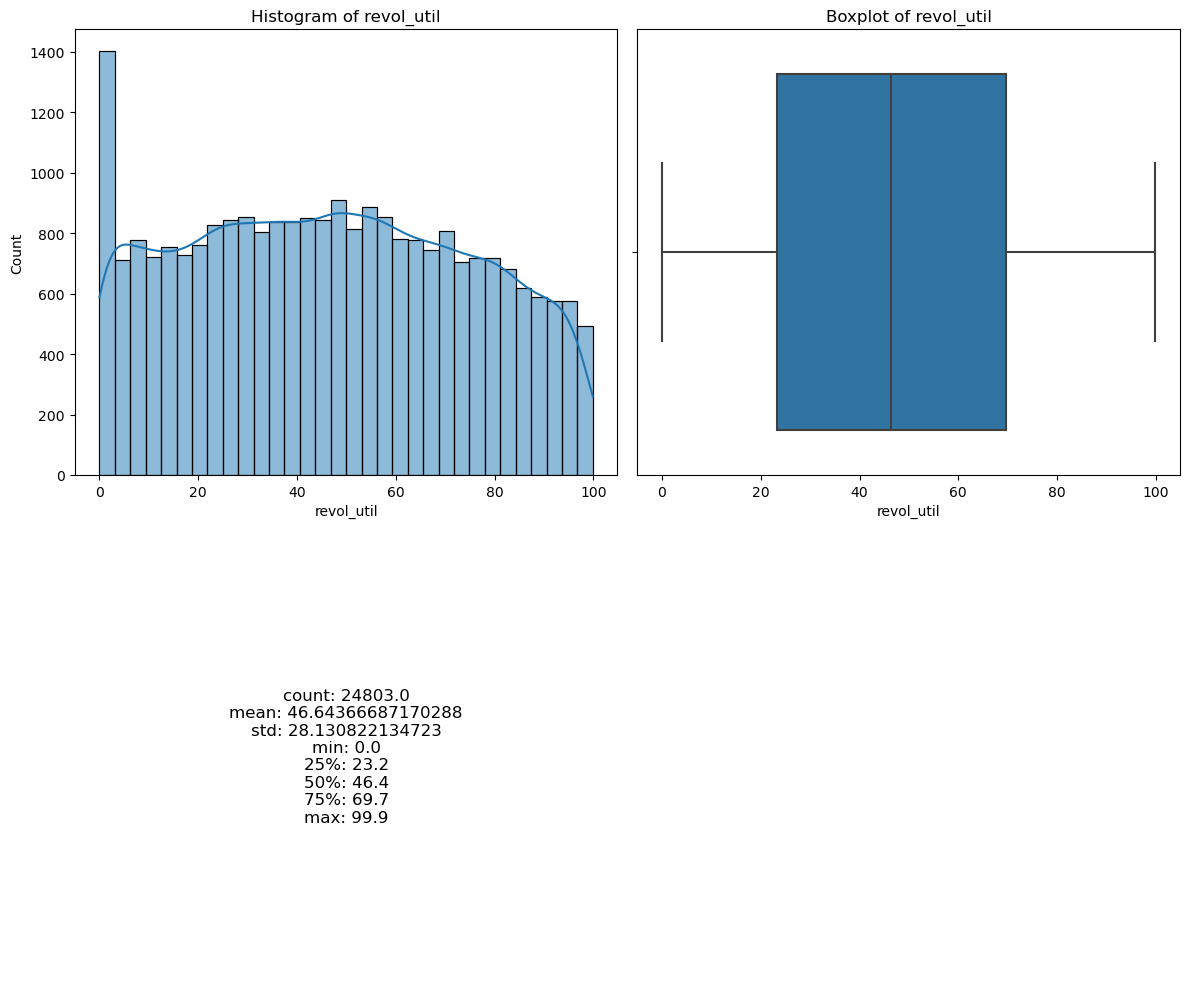

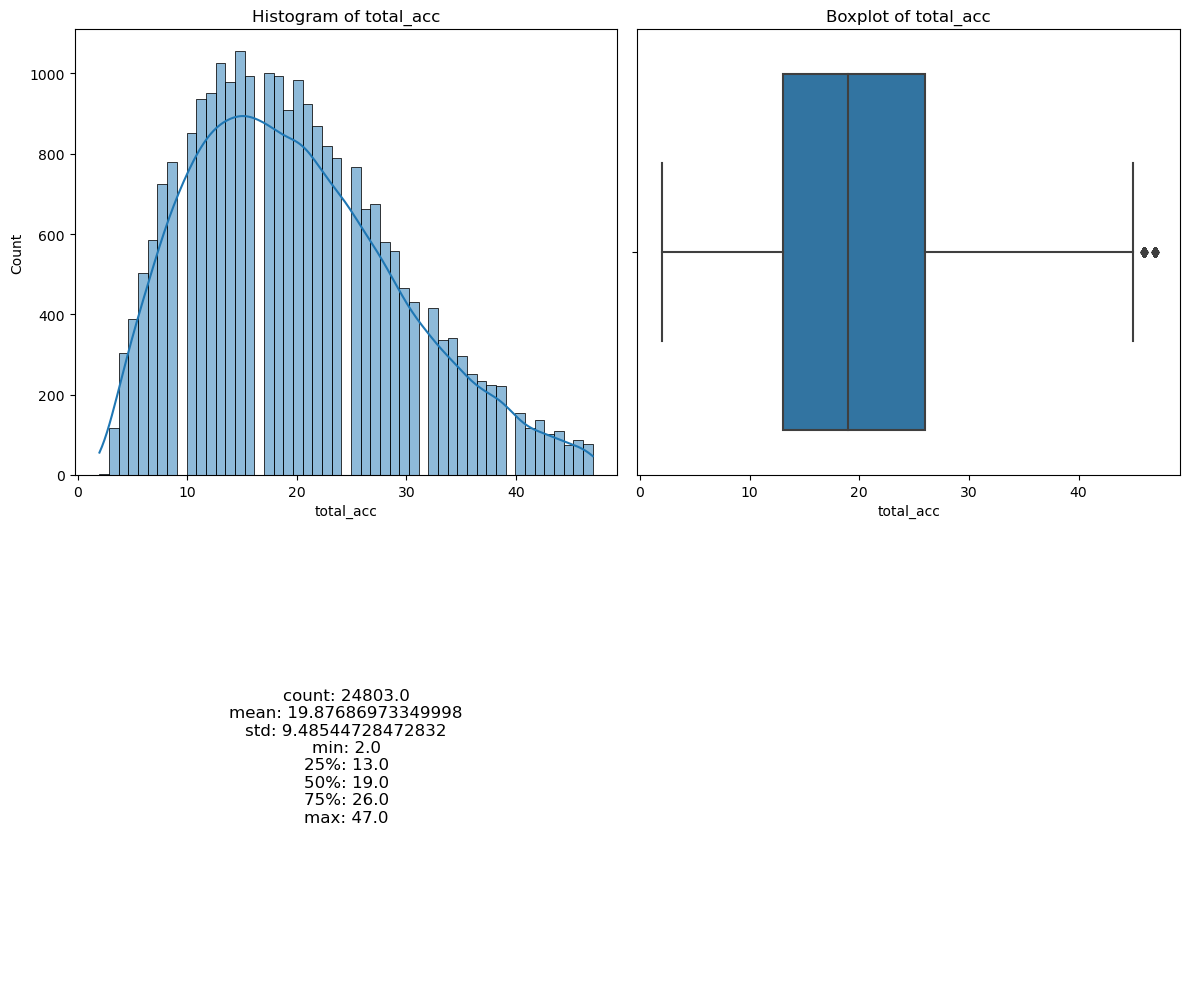

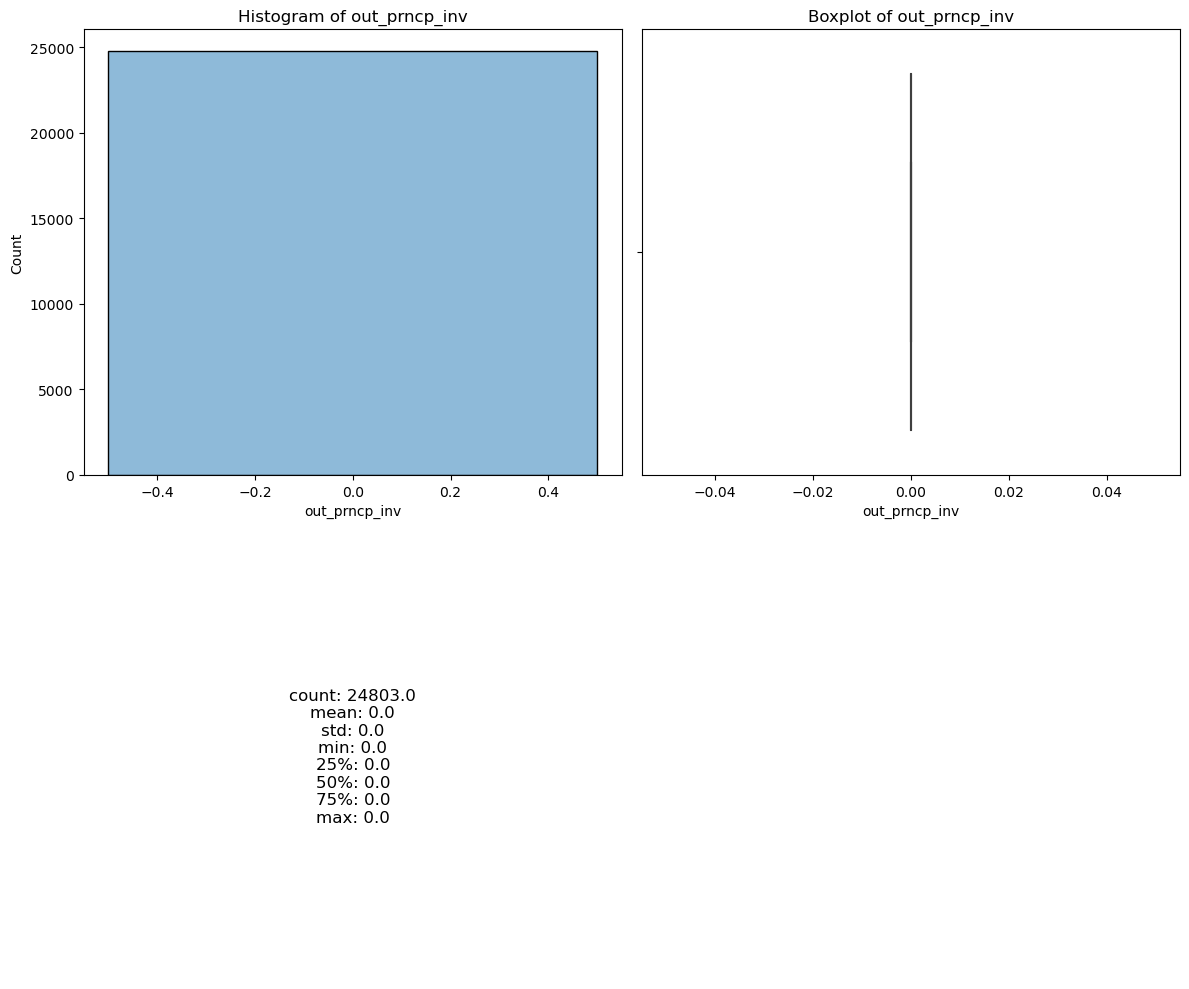

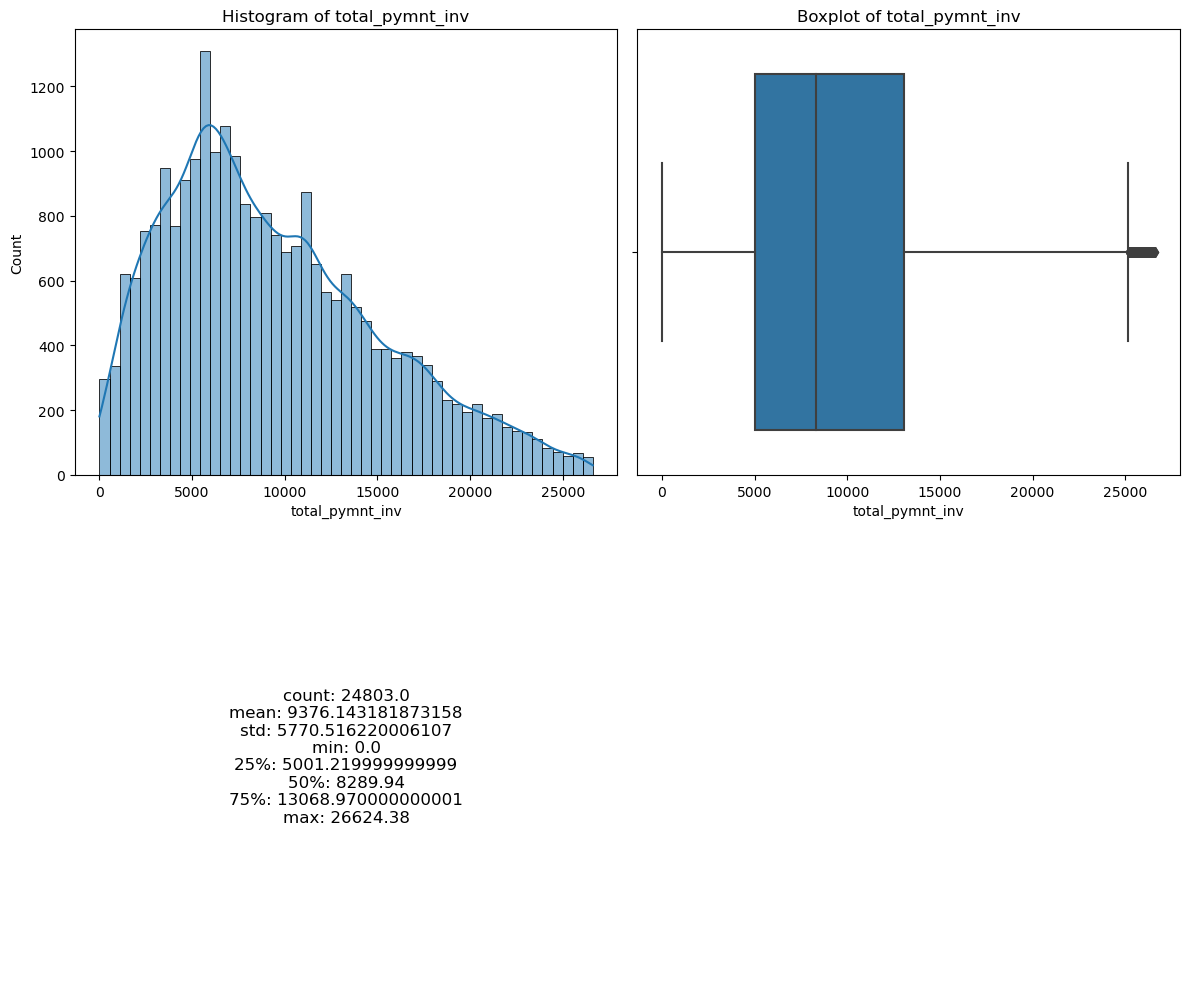

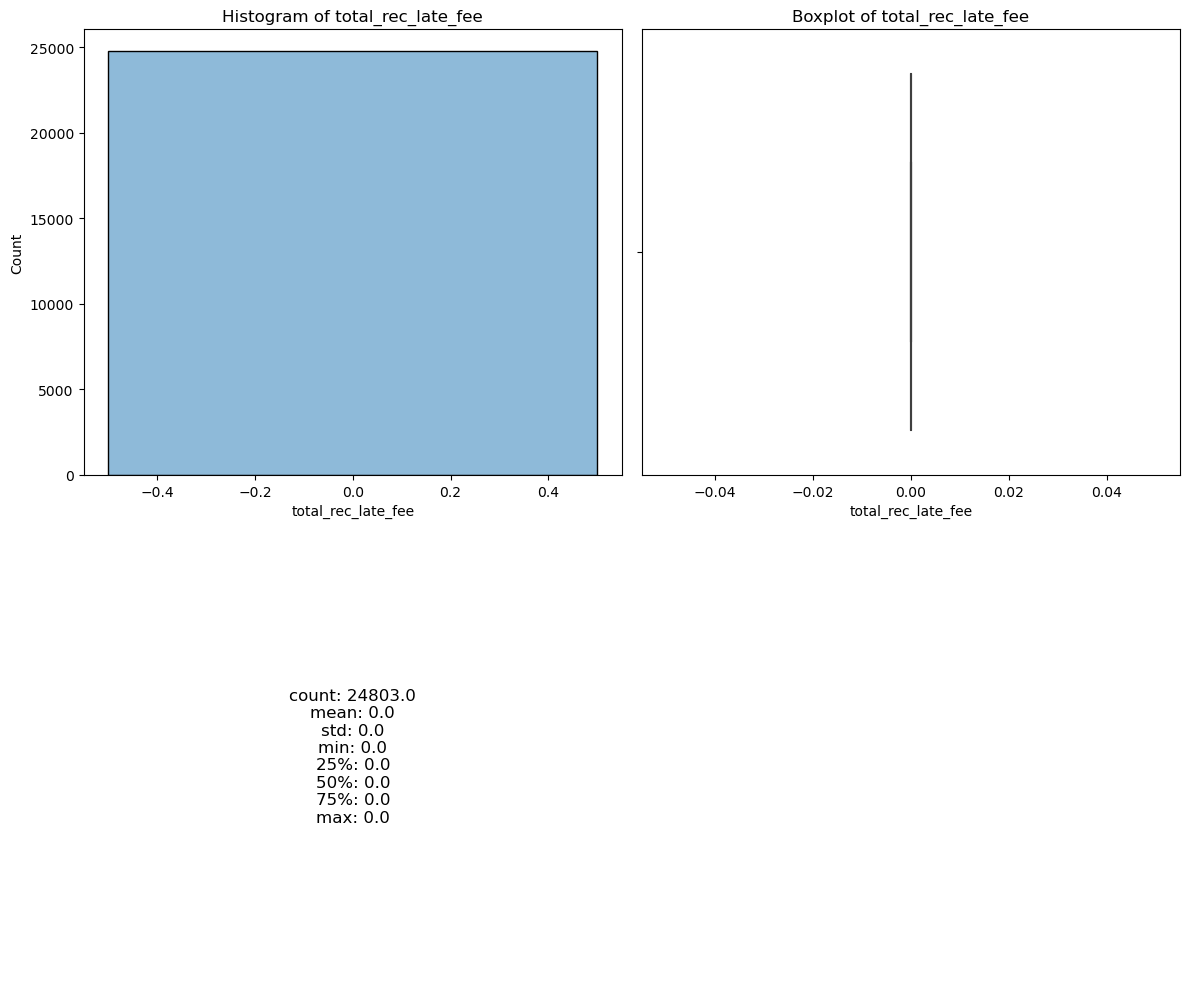

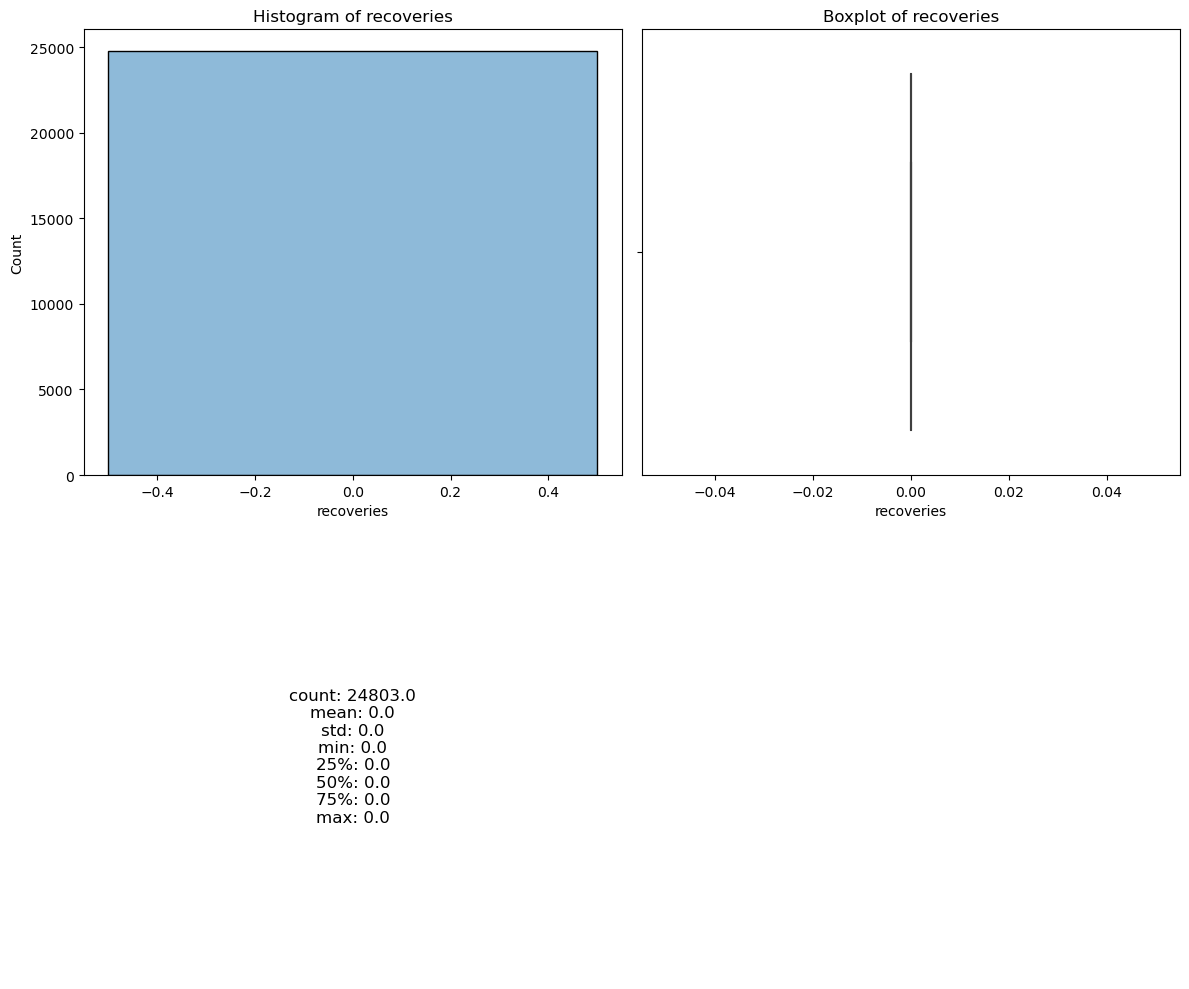

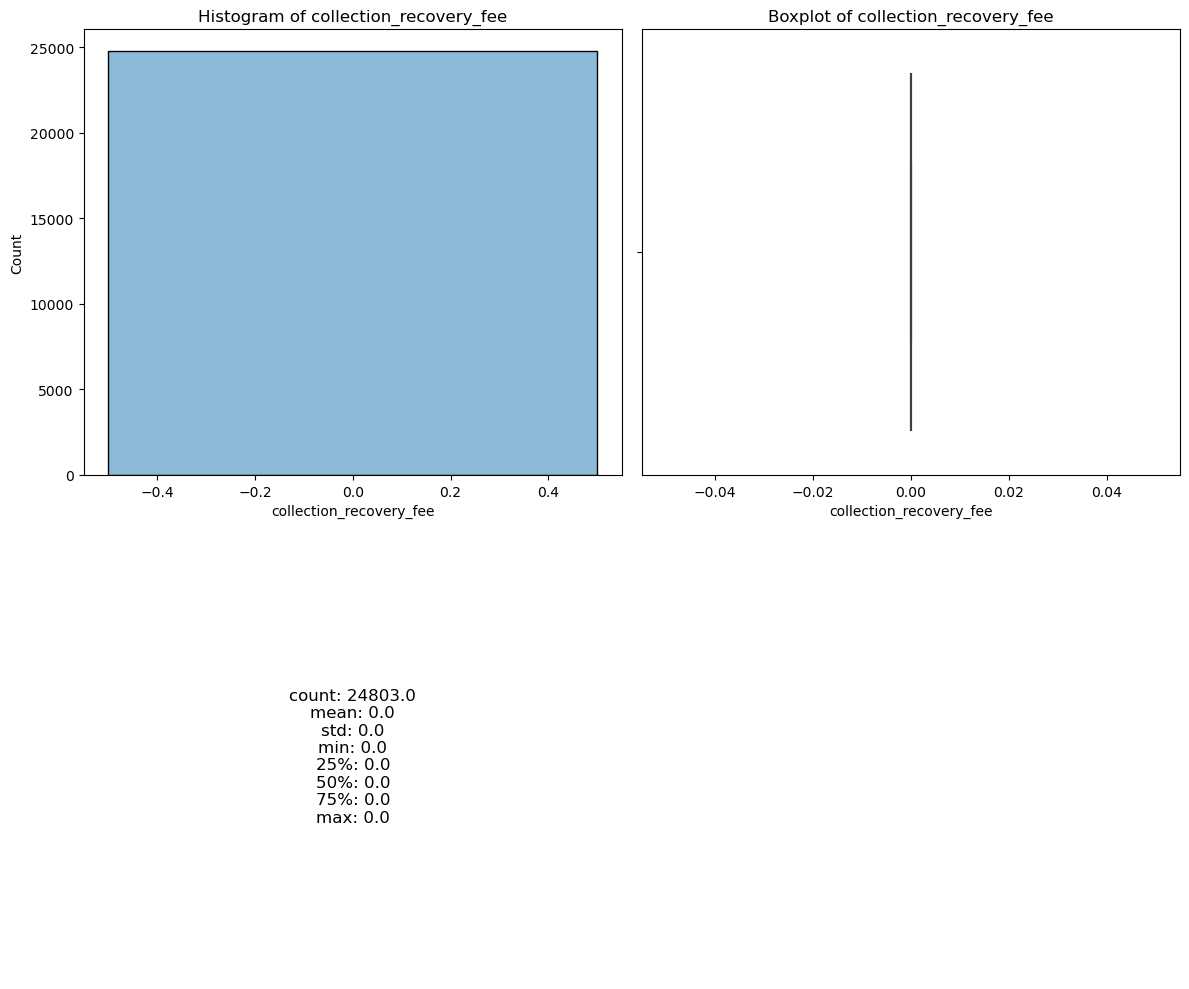

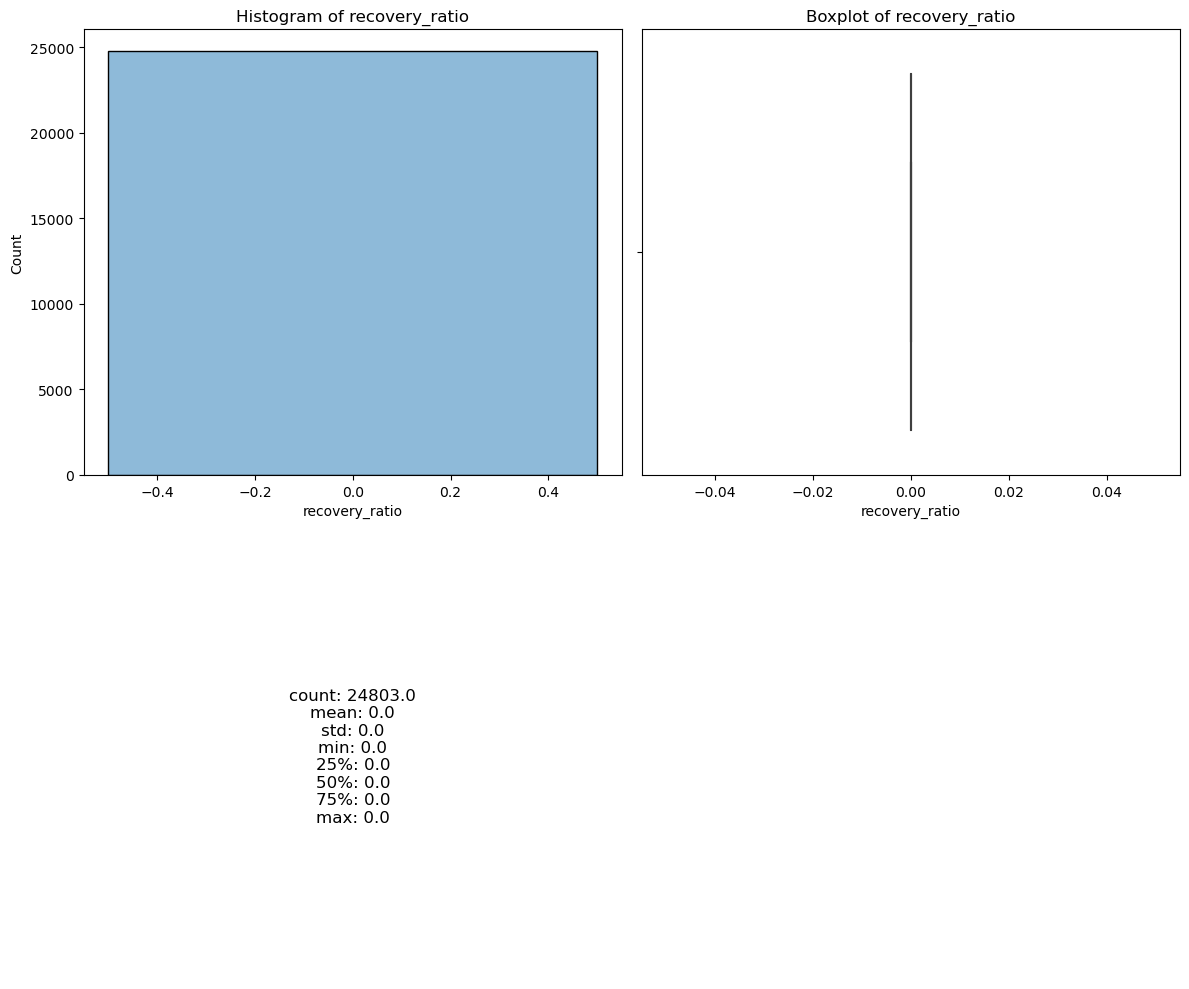

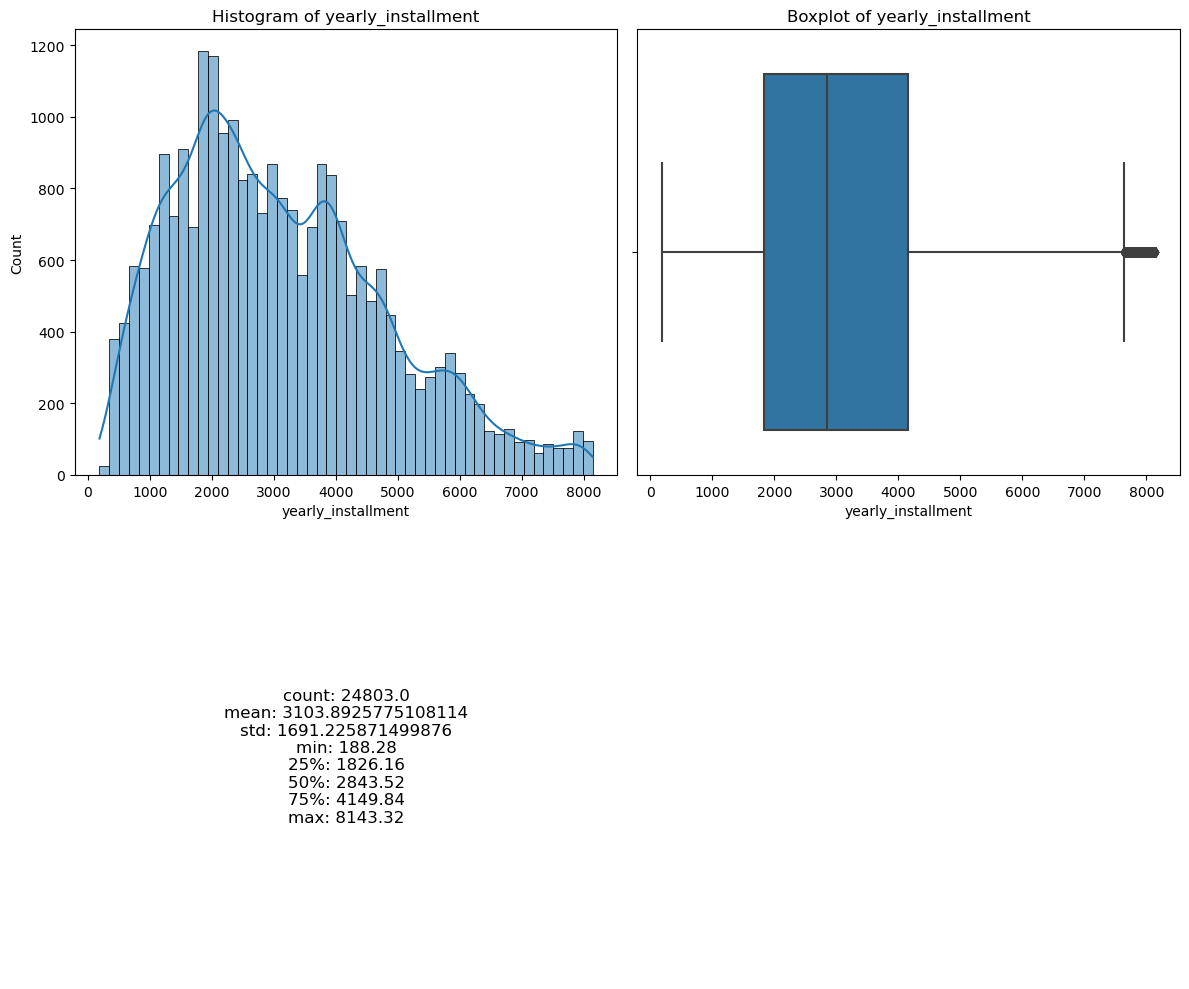

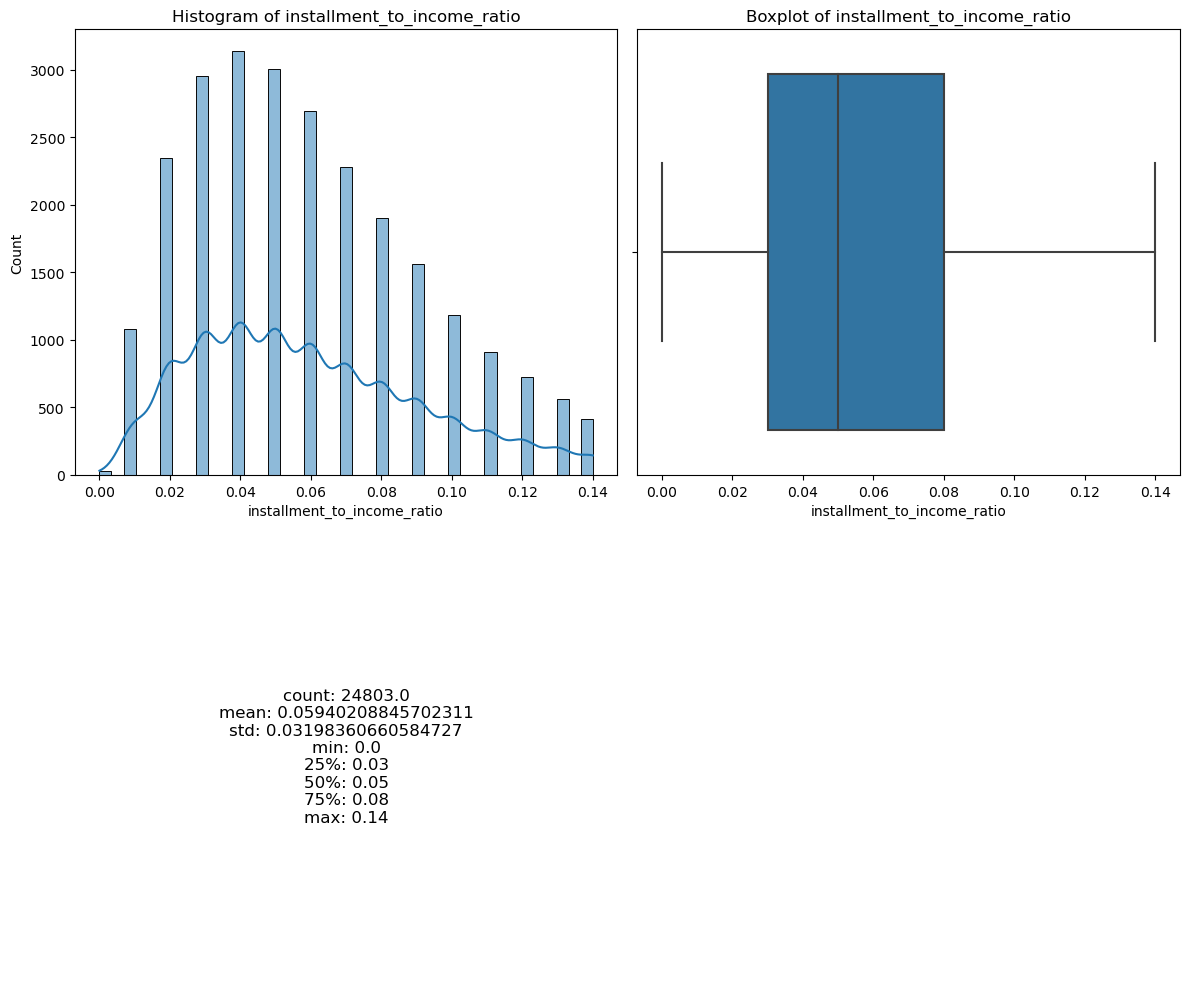

In [69]:
for col in numerical_columns:
    plot_histogram_and_boxplot(loan_data,col)

### other analysis on univariate 

In [70]:
# Converting the 'sub_grade' column to numeric values by extracting the last character of each string and converting it to an integer.
# Displaying the first few rows of the 'sub_grade' column after conversion.

loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
2    5
5    4
6    5
7    1
Name: sub_grade, dtype: int64

Plotting a countplot to visualize the distribution of loan grades among charged-off loans. Filtering the data to include only charged-off loans and specifying the order of grades from 'A' to 'G'.

<AxesSubplot:xlabel='grade', ylabel='count'>

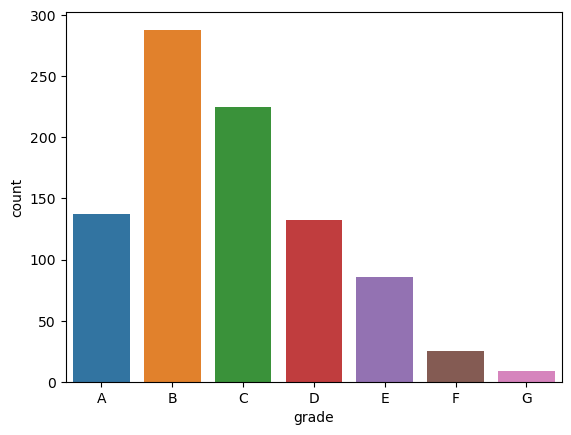

In [71]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

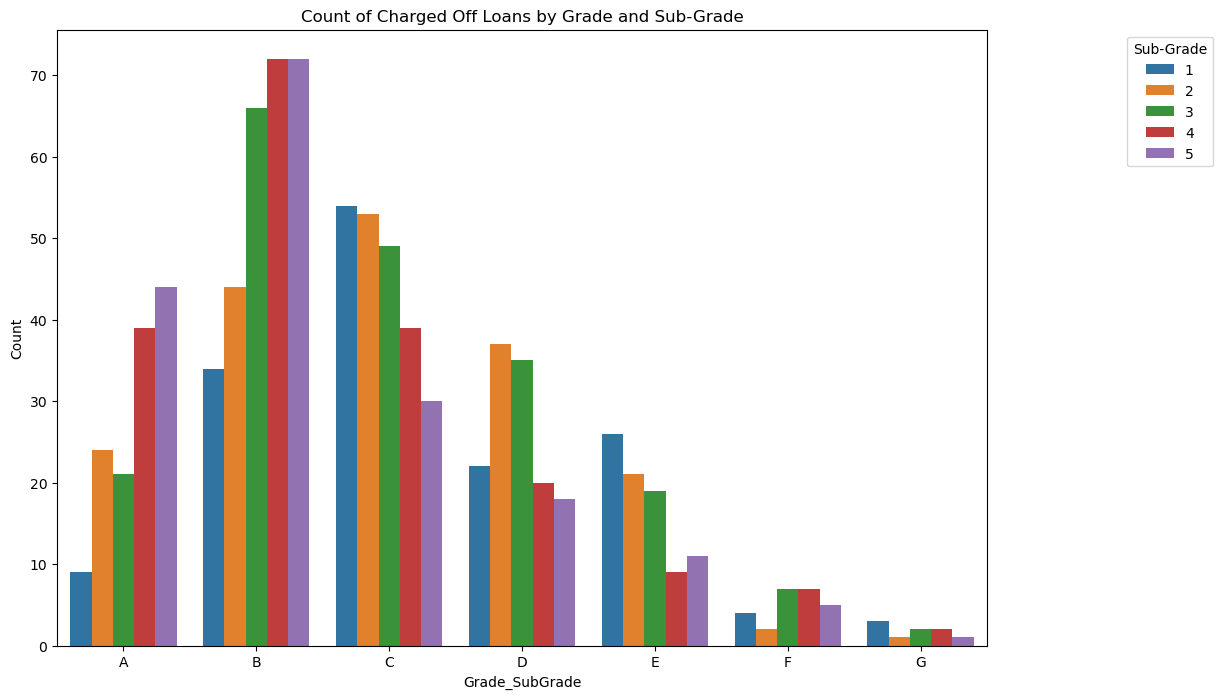

In [72]:
# Plotting a countplot to visualize the distribution of charged-off loans by grade and sub-grade.
# Filtering the data to include only charged-off loans and specifying the order of grades from 'A' to 'G'.

fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

# Set plot title and axis labels
ax.set_title('Count of Charged Off Loans by Grade and Sub-Grade')
ax.set_xlabel('Grade_SubGrade')
ax.set_ylabel('Count')

# Move legend outside the plot
ax.legend(loc='upper right', title='Sub-Grade', bbox_to_anchor=(1.25, 1))

## Observations

The above analysis with respect to the charged off loans for grade and sub_grade suggests the following:

- There is a higher probability of defaulting when the **Grade** is **'B'**.
- Total Grade of **'B5'** level also indicates a higher probability of defaulting.

### Analyzing purpose
 

<AxesSubplot:xlabel='count', ylabel='purpose'>

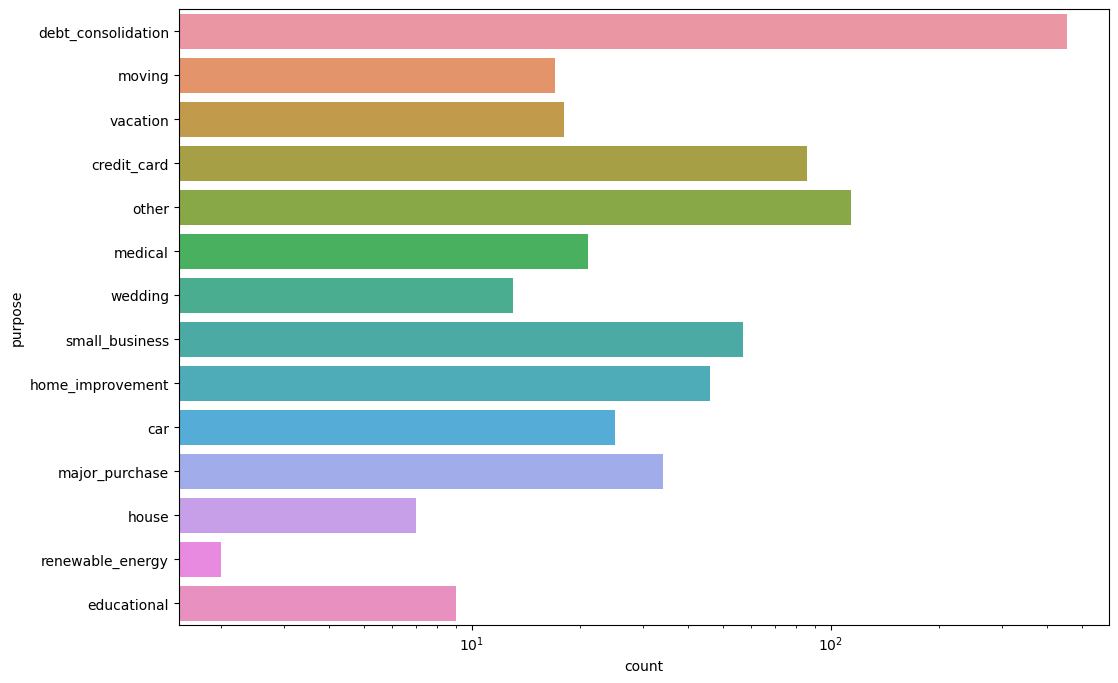

In [73]:
#Creating a subplot with a specified figure size and setting the x-axis scale to logarithmic.
#Plotting a countplot to visualize the distribution of charged-off loans by purpose.
#Filtering the data to include only charged-off loans.

fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

##  Observations: 
The above analysis with respect to the charged off loans for purpose suggests the following. There is a more probability of defaulting when :

**Applicants who use the loan to clear other debts**

#### State analysis 

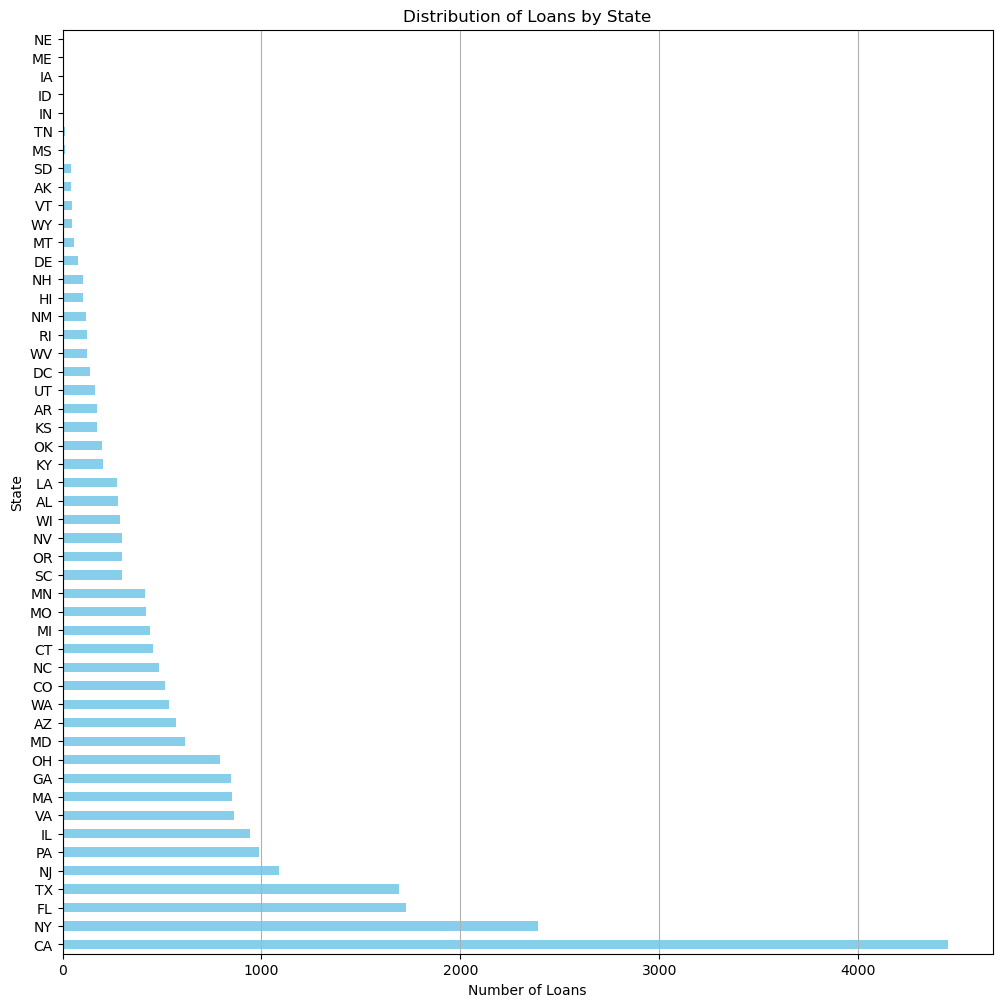

In [74]:
# Calculating the count of loans per state and creating a horizontal bar plot to visualize the distribution.
# Setting figure size, plot type, color, labels, and title for clarity.
# Adding gridlines along the x-axis for better readability of loan counts.


state_counts = loan_data['addr_state'].value_counts()

plt.figure(figsize=(12, 12))
state_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.title('Distribution of Loans by State')
plt.grid(axis='x')
plt.show()

## Observation - 
Most of the Loan applicants are from **CA(State)**.

### To enhance our analysis, we can categorize certain columns using bins.

**int_rate**

In [75]:
# Creating groups for interest rates by categorizing them into five bins with specified ranges and labels.
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

**open_acc**

In [76]:
#similarly, creating bins for open_acc
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [77]:
#creating bins for Revolving line utilization rate 
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

In [78]:
#creating bins for Total credit revolving balance 
loan_data['revol_bal_groups'] = pd.cut(loan_data['revol_bal'], bins=5,precision =0,labels=['0-3565', '3566-8522', '8523-16212', '16213-50000', '50001-149000'])

In [79]:
#creating bins for total number of credit lines
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

In [80]:
# creating bins for annual income
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

#### Analyzing interest rate wrt the interest rate bins created

<AxesSubplot:xlabel='emp_length', ylabel='count'>

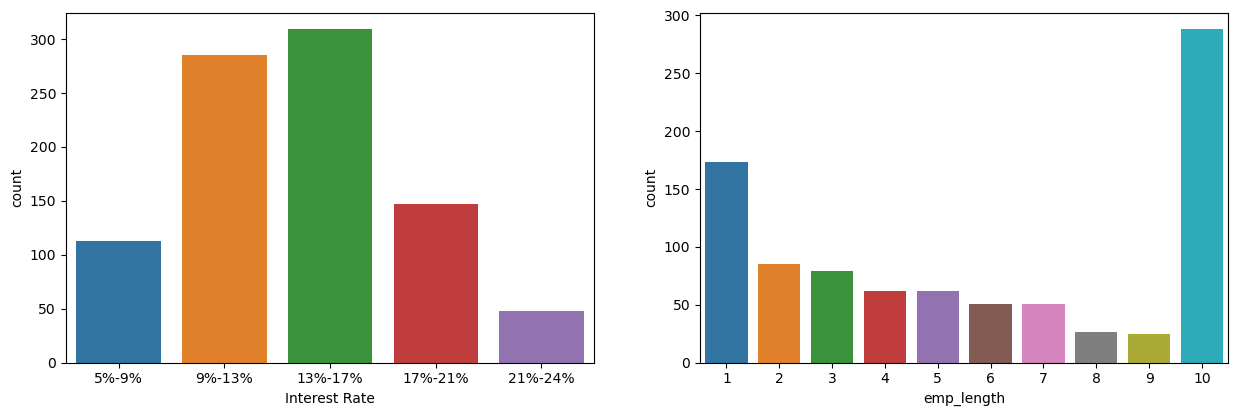

In [81]:
# Creating a subplot with a specified figure size to compare the count of charged-off loans across different interest rate groups and employment lengths.
# In the first subplot, a countplot is used to visualize the distribution of charged-off loans by interest rate group.
# In the second subplot, another countplot displays the distribution of charged-off loans by employment length.
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])



## Observations: 
The above analysis with respect to the charged off loans for Interest_Group and Emp_length suggests the following. There is a more probability of defaulting when :

Applicants who receive interest at the rate of 13-17%

Applicants with employement length of 10

#### Analyzing open_acc, revol_util, revol_bal, total_acc, annual_inc

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

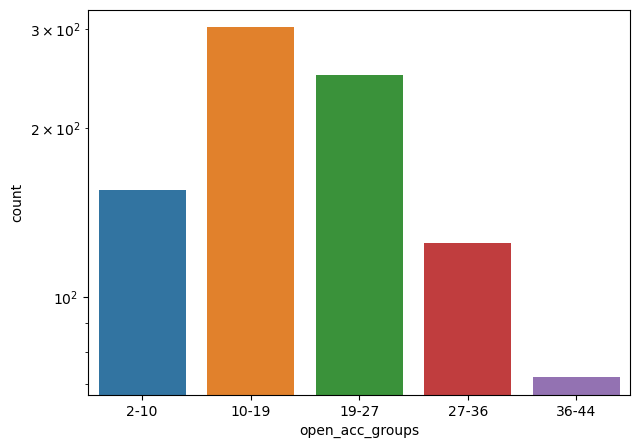

In [82]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Observations:
The above analysis with respect to the charged off loans for Open Account Group suggests the following. There is a more 
probability of defaulting when :

Applicants who have 2-10 open accounts

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

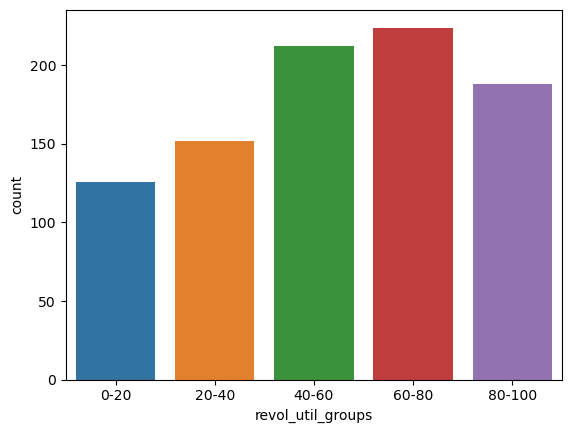

In [83]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])


## Observations: 
The above analysis with respect to the charged off loans for Revolving line utilization rate group suggests the following. There is a more probability of defaulting when :

Applicants who are having 60-80% utilization rate

<AxesSubplot:xlabel='revol_bal_groups', ylabel='count'>

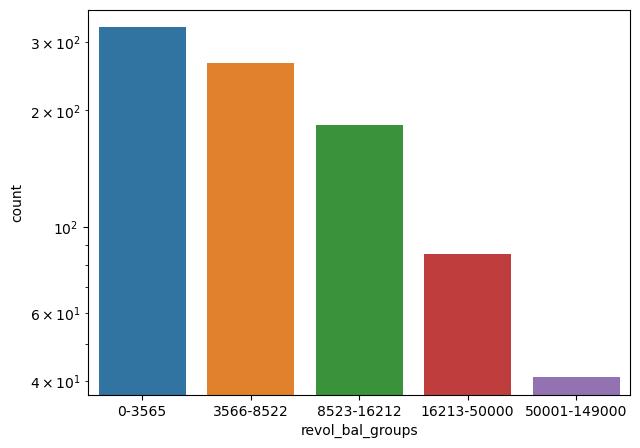

In [84]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='revol_bal_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Observations: 
The above analysis with respect to the charged off loans for Revolving Balance Group suggests the following. There is a more probability of defaulting when :

Applicants who have Revolving Balance in the range of 0-3565

#### Analyzing total_acc_groups

 

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

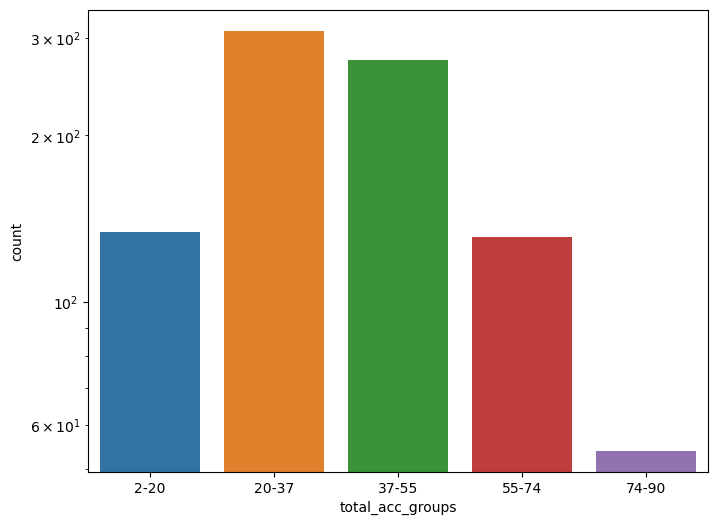

In [85]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Observations: 
The above analysis with respect to the charged off loans for Total acc/Total credit lines group suggests the following. There is a more probability of defaulting when :

Applicants who have credit lines in 2-20 range

#### Analyzing anual_inc_groups

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

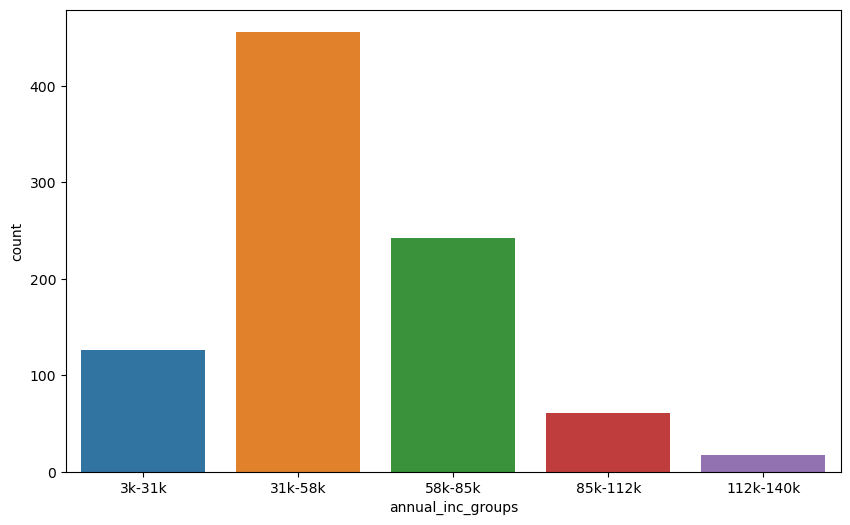

In [86]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Observations: 
The above analysis with respect to the charged off loans for Annual Income Group suggests the following. There is a more probability of defaulting when :

Applicants who have an income of range 31k-58k

#### Analyzing term column

 

<AxesSubplot:xlabel='count', ylabel='term'>

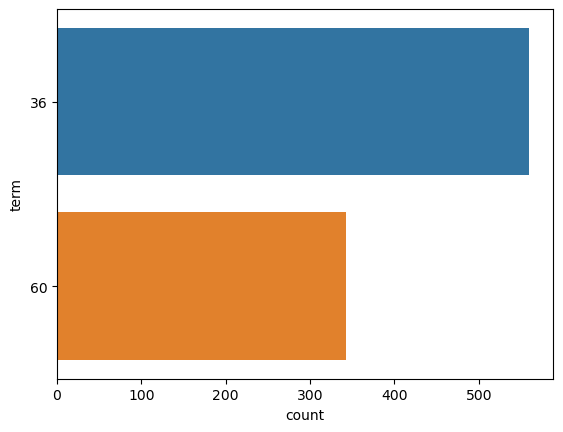

In [87]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])


## Observations: 
The above analysis with respect to the charged off loans for Term suggests the following. There is a more probability of defaulting when :

Applicants who have Term of 36 months

#### Analyzing verification_status



<AxesSubplot:xlabel='verification_status', ylabel='count'>

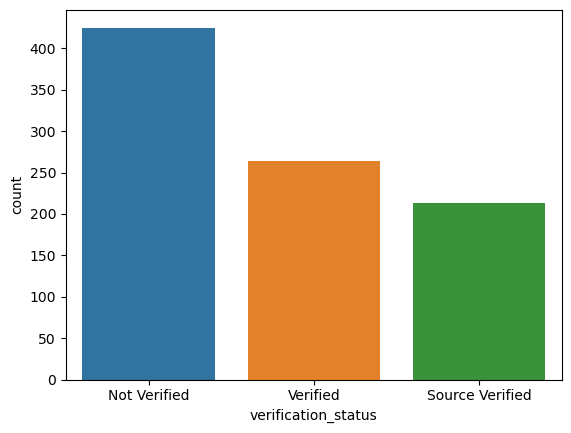

In [88]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])


## Observations: 
The above analysis with respect to the charged off loans for Verification Status suggests the following. There is a more probability of defaulting when :

Applicants when verification status says Not Verified

#### Analyzing inq_last_6mths

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

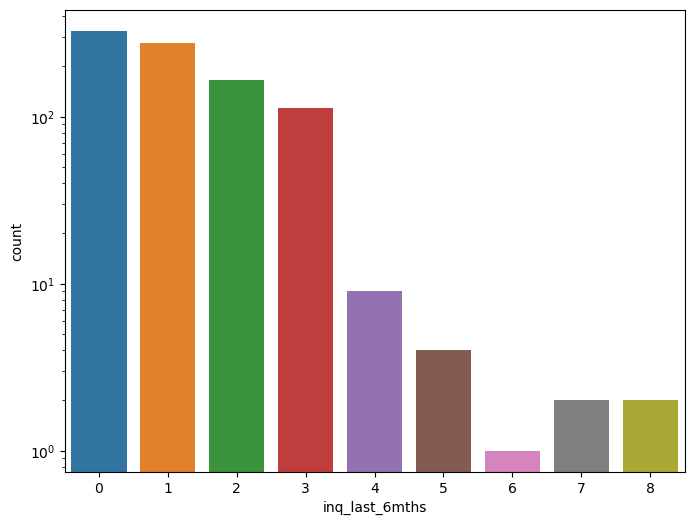

In [89]:
fig,ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Observations: 
The above analysis with respect to the charged off loans for * inquiries in past 6 months* suggests the following. There is a more probability of defaulting when :

number of enquiries in last 6 months is 0

#### Analyzing by issued month and year

<AxesSubplot:xlabel='issue_year', ylabel='count'>

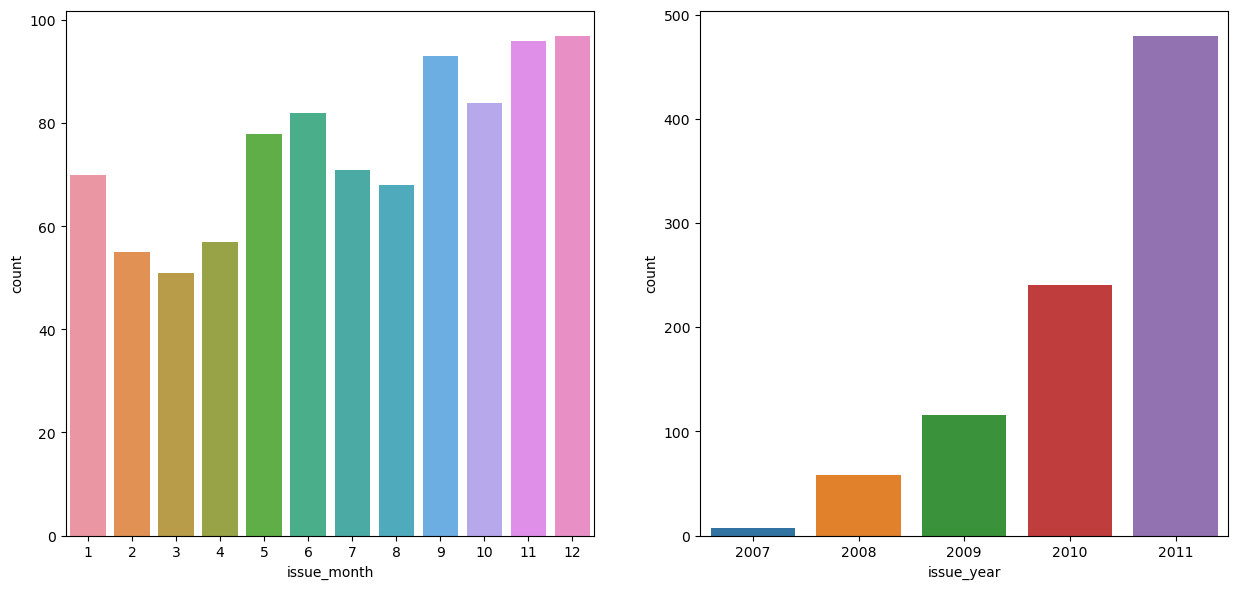

In [90]:
# Plotting count of charged off loans by issue month and year
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Observations: 
The above analysis with respect to the charged off loans for issue_month and issue_year suggests the following :

Maximum number of defaults occured when the loan was sanctioned/issued in Dec(12)
Loan issued in the year
Maximum Defaults in December (Issue Month 12)
Loans Issued in 2011 (Issue Year)

#  Bivariate Analysis
## Bivariate analysis to explore the relationship between annual income and Chargedoff_Proportion

In [91]:
# Grouping the data by annual income groups and loan status
inc_range_vs_loan = loan_data.groupby(['annual_inc_groups', 'loan_status']).loan_status.count().unstack().reset_index()

# Calculating the total count of charged off and fully paid loans
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid']

# Calculating the proportion of charged off loans relative to the total
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']

# Sorting the dataframe by Chargedoff_Proportion in descending order
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_inc_groups  Charged Off  Fully Paid  Total  \
1                     31k-58k          456       10152  10608   
0                      3k-31k          126        3135   3261   
2                     58k-85k          242        6929   7171   
3                    85k-112k           61        2737   2798   
4                   112k-140k           17         948    965   

loan_status  Chargedoff_Proportion  
1                         0.042986  
0                         0.038638  
2                         0.033747  
3                         0.021801  
4                         0.017617

In [92]:
def plot_barplot(data, x, palette, title, x_label):
    plt.figure(figsize=(8, 5), facecolor='lightgrey')

    # Create a bar plot
    ax = sns.barplot(x=x, y='Chargedoff_Proportion', data=data, palette=palette)

    # Set title, labels, and ticks with custom font properties
    plt.title(f'Charged-off Proportion vs. {title}', fontsize=18, color='navy', fontweight='bold')
    plt.xlabel(x_label, fontsize=14, color='navy', fontweight='bold')
    plt.ylabel('Charged-off Proportion', fontsize=14, color='navy', fontweight='bold')
    plt.xticks(fontsize=12, color='navy', rotation=45)
    plt.yticks(fontsize=12, color='navy')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

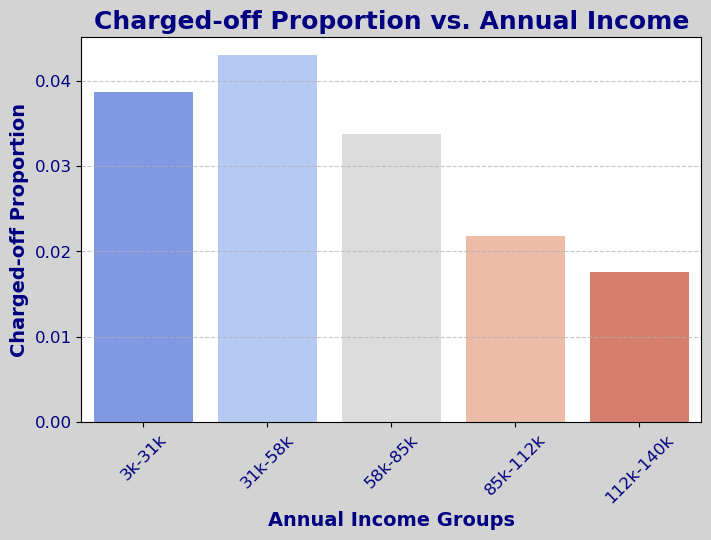

In [93]:
# using above function Plotting bar plot to visualize the relationship between annual income groups /
# and the proportion of charged-off instances
plot_barplot(inc_range_vs_loan, 'annual_inc_groups', 'coolwarm', 'Annual Income', 'Annual Income Groups')

## Observations:

Income range 85000+ has less chances of charged off.

Income range 3k-31k has high chances of charged off.

Notice that with increase in annual income charged off proportion got decreased.

## Bivariate Analysis on Interest Rate Group against Chargedoff_Proportion


In [94]:
int_rate_range_vs_loan = loan_data.groupby(['int_rate_groups', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_range_vs_loan['Total'] = int_rate_range_vs_loan['Charged Off']+ int_rate_range_vs_loan['Fully Paid']
int_rate_range_vs_loan['Chargedoff_Proportion'] = int_rate_range_vs_loan['Charged Off'] / int_rate_range_vs_loan['Total']
int_rate_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status int_rate_groups  Charged Off  Fully Paid  Total  \
4                   21%-24%           48         360    408   
3                   17%-21%          147        2534   2681   
2                   13%-17%          309        6430   6739   
1                    9%-13%          285        7693   7978   
0                     5%-9%          113        6884   6997   

loan_status  Chargedoff_Proportion  
4                         0.117647  
3                         0.054830  
2                         0.045853  
1                         0.035723  
0                         0.016150

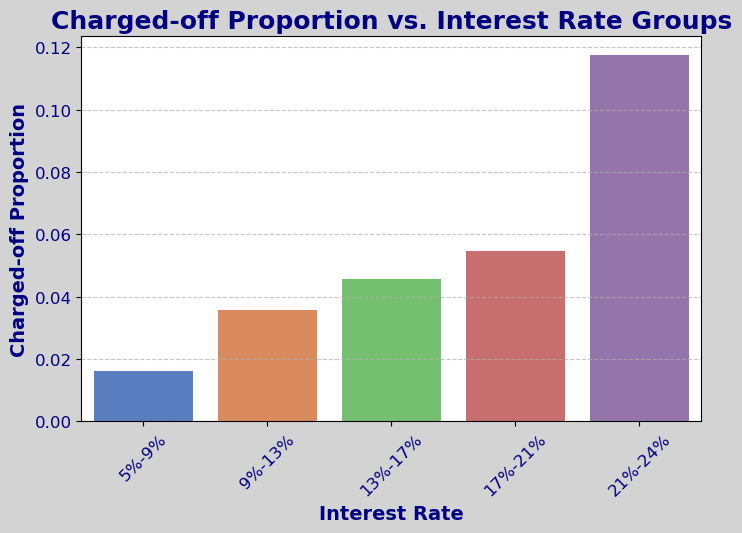

In [95]:
# using above function Plotting bar plot to visualize the relationship between Interest rate Groups /
# and the proportion of charged-off instances
plot_barplot(int_rate_range_vs_loan, 'int_rate_groups', 'muted', 'Interest Rate Groups', 'Interest Rate')

## Observations:

In univariate analysis, a higher count of charged-off loans was observed in the interest rate group of 13%-17%. However, in bivariate analysis, when considering the proportion of charged-off loans relative to the total number of loans in each interest rate group, it was found that the charged-off proportion was highest in the interest rate group of 21%-24%.

**As interest rate increasing charged of percentage also increasing** 

## Bivariate Analysis on Term against Chargedoff_Proportion


In [96]:
term_vs_loan = loan_data.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_vs_loan['Total'] = term_vs_loan['Charged Off']+ term_vs_loan['Fully Paid']
term_vs_loan['Chargedoff_Proportion'] = term_vs_loan['Charged Off'] / term_vs_loan['Total']
term_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  term  Charged Off  Fully Paid  Total  Chargedoff_Proportion
1              60          342        4498   4840               0.070661
0              36          560       19403  19963               0.028052

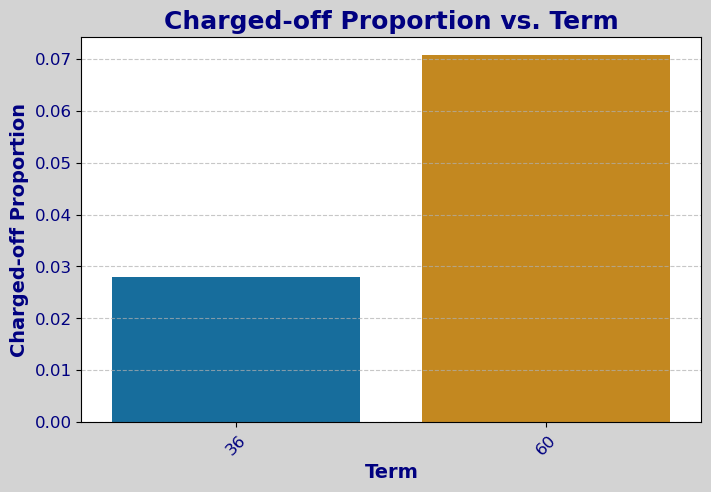

In [97]:
# using above function Plotting bar plot to visualize the relationship between Term /
# and the proportion of charged-off instances
plot_barplot(term_vs_loan, 'term', 'colorblind', 'Term', 'Term')

## Observations:

This suggests that although loans with a 36-month term may have a higher count of charged-off instances, loans with a longer term of 60 months exhibit a higher proportion of charged-off instances relative to the total number of loans in that term category.

## Bivariate Analysis on Grade against Chargedoff_Proportion

In [98]:
grade_vs_loan = loan_data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G            9          44     53               0.169811
5               F           25         289    314               0.079618
4               E           86        1068   1154               0.074523
3               D          132        2630   2762               0.047791
2               C          225        4668   4893               0.045984
1               B          288        7555   7843               0.036721
0               A          137        7647   7784               0.017600

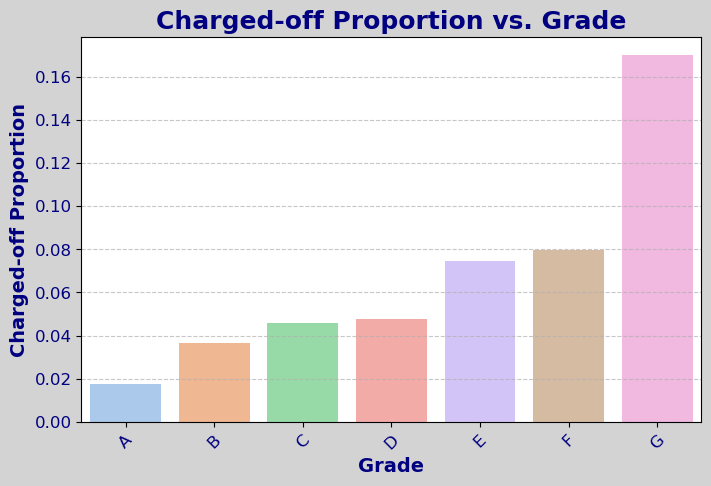

In [99]:
# using above function Plotting bar plot to visualize the relationship between Grade /
# and the proportion of charged-off instances
plot_barplot(grade_vs_loan, 'grade', 'pastel', 'Grade', 'Grade')

## Observations:

The discrepancy between the univariate and bivariate analyses regarding the grade with the highest proportion of charged-off loans. While the univariate analysis pointed towards Grade B as having the highest count of charged-off loans, the bivariate analysis indicates that Grade B actually has a lower proportion of charged-off loans compared to Grades C, D, E, F, and G. This suggests that while Grade B loans may have a higher count of defaults, when considering the proportion relative to the total number of loans in each grade, the risk of default is lower compared to lower-grade loans

##  Bivariate Analysis on public record bankruptcies against Chargedoff_Proportion -


In [100]:
pub_rec_bankruptcies_vs_loan = loan_data.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                             2.0            1           2      3   
1                             1.0           90        1044   1134   
0                             0.0          811       22855  23666   

loan_status  Chargedoff_Proportion  
2                         0.333333  
1                         0.079365  
0                         0.034269

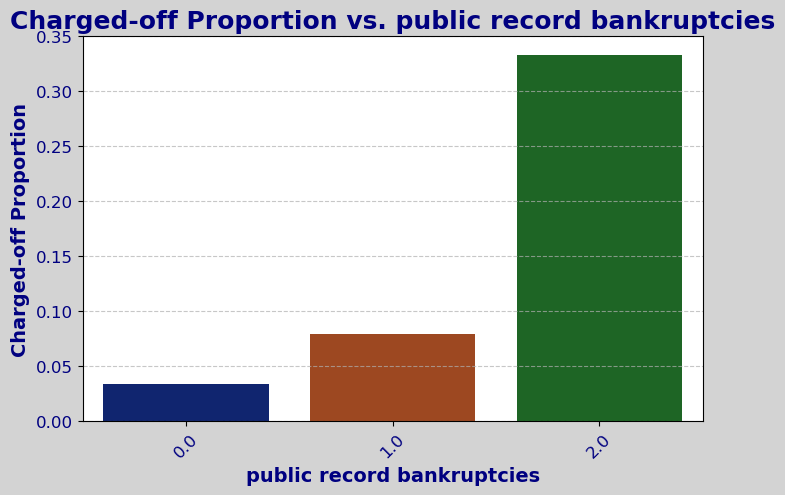

In [101]:
# using above function Plotting bar plot to visualize the relationship between public record bankruptcies /
# and the proportion of charged-off instances
plot_barplot(pub_rec_bankruptcies_vs_loan, 'pub_rec_bankruptcies', 'dark', 'public record bankruptcies', 'public record bankruptcies')

Observations:

The analysis on public record bankruptcies suggests that borrowers with two bankruptcies have the highest proportion of charged-off loans, followed by borrowers with one bankruptcy. Borrowers with no bankruptcies have the lowest proportion of charged-off loans. 

**increse in public record bankruptcies increases the charged off proportion**

In [102]:
numerical_col=[col for col in numerical_data if col not in ["out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","recovery_ratio"]]

# Correlation

In [103]:
for i in numerical_col:
    loan_data[i]=loan_data[i].astype("int")

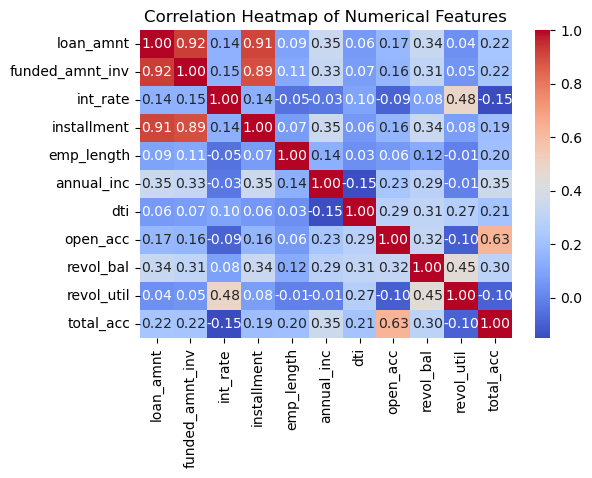

In [104]:
# Select numerical columns for correlation analysis
numerical_col=['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month']
numerical_data = loan_data[numerical_col]
# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Observations:

### Negative Correlation:

loan_amnt has negative correlation with pub_rec_bankrupticies

annual income has a negative correlation with dti

### Strong Correlation:

term has a strong correlation with loan amount

term has a strong correlation with interest rate

annual income has a strong correlation with loan_amount

# Multivariate Analysis

### 1.Annual income vs loan purpose

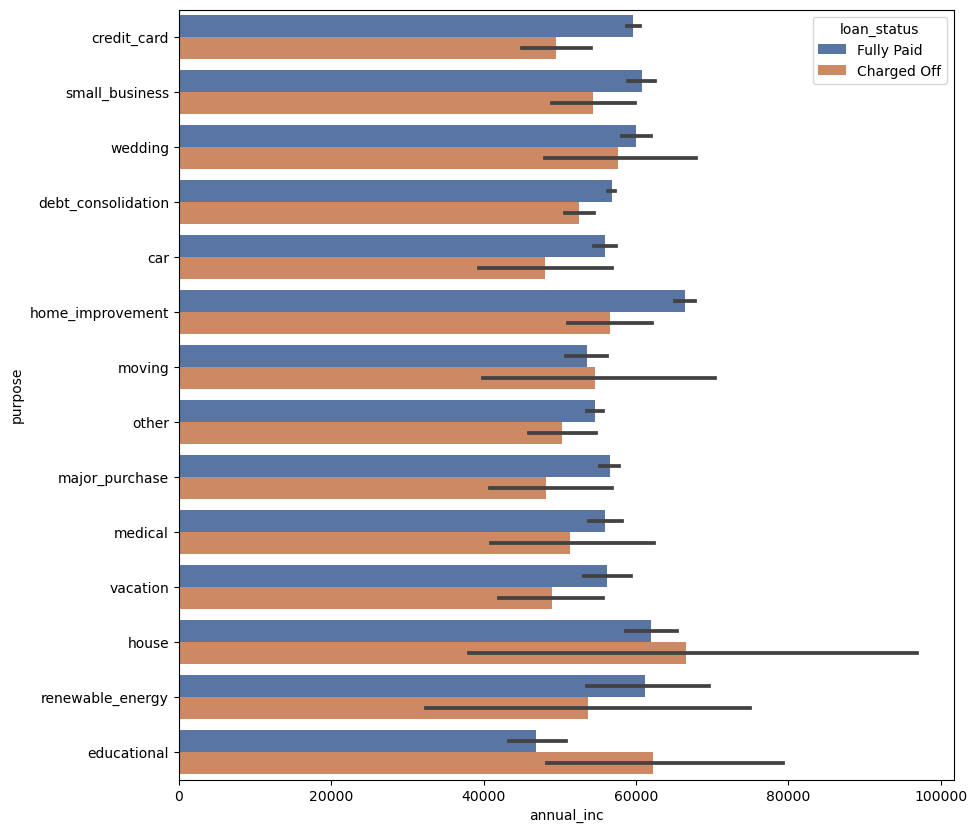

In [105]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

## **Observations**

- **Loan Purpose:** The highest number of loans applied and defaulted are for "debt consolidation". 
- **Annual Income:** Applicants with higher salaries mostly apply for loans for "home improvement", "house", "renewable energy", "credit card", and "small businesses".
- **Default Likelihood:** Applicants taking loans for 'home improvement' with an income of 60k-70k are more likely to default.


### 2.Annual income vs home ownership

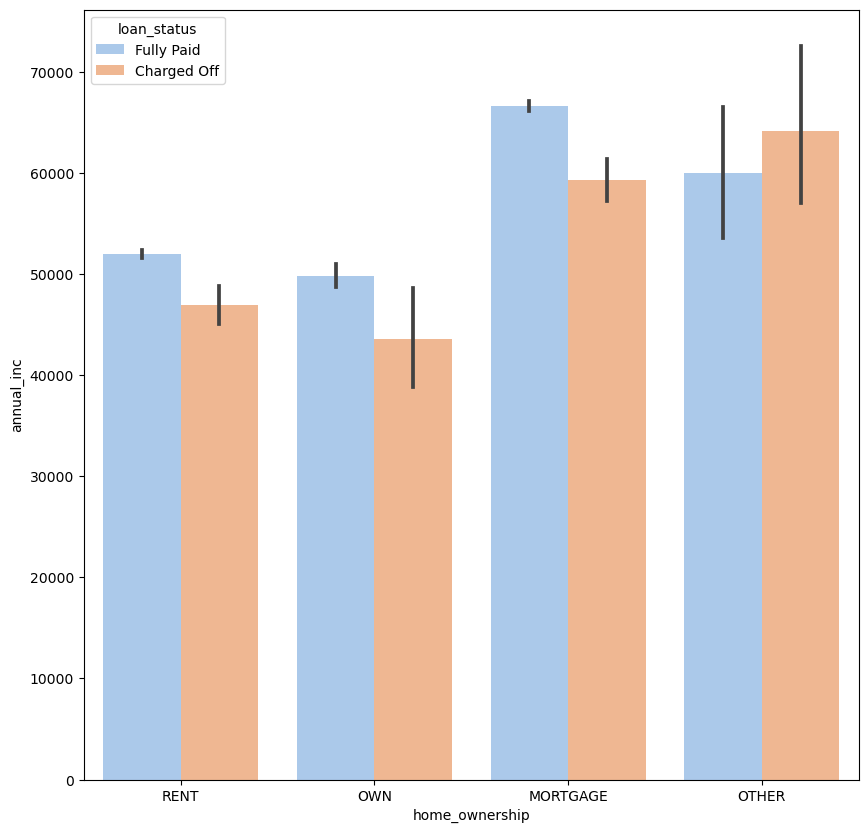

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## OBSERVATIONS:
More likely to Default -
Applicants whose home
ownership is 'MORTGAGE and
have income of 60-70k

### Annual Income vs Loan amount

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

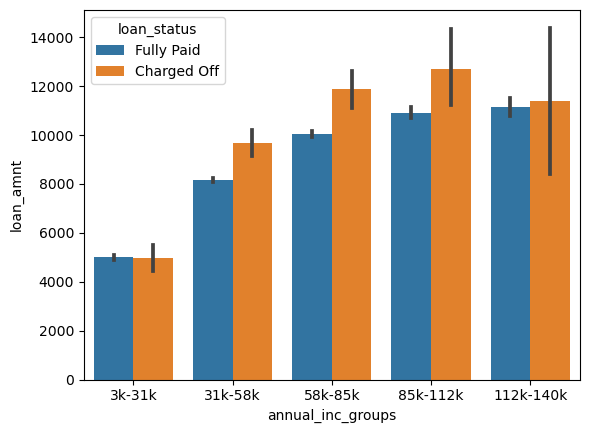

In [107]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_data)

## Observation:

Across all the income groups, Higher the loan amount higher the Default cases

### Annual income vs int_rate

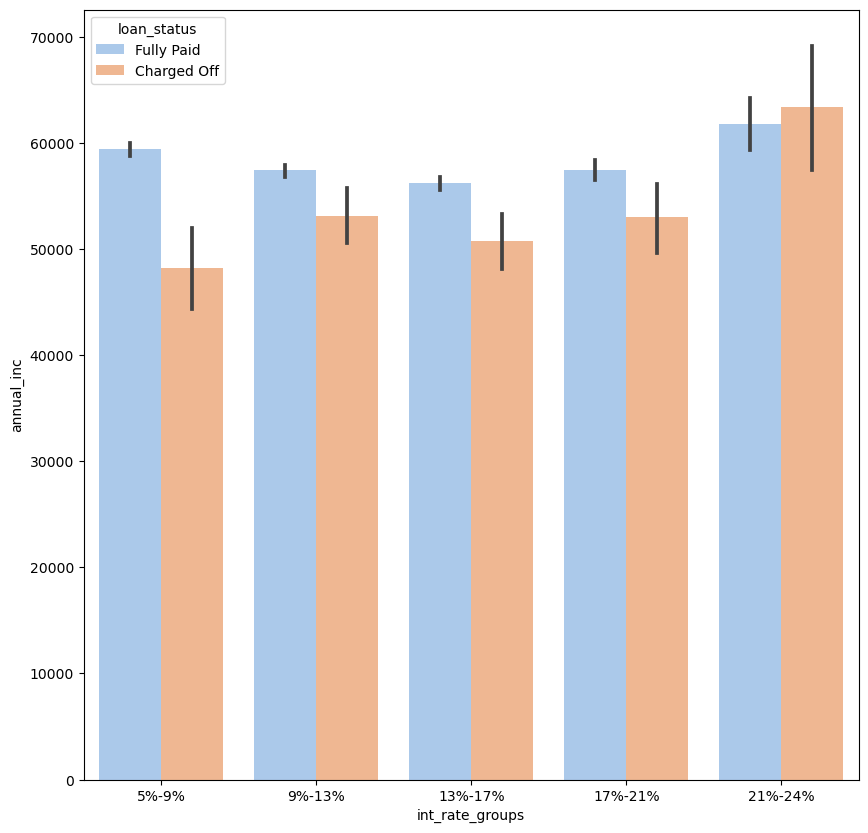

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Recommendations

Based on the observations from the univariate and bivariate analyses, here are the recommendations for lenders:

1. **Interest Rate and Employment Length**:
   - Be cautious with loans having interest rates of **13%-17%** and an employment length of **10 years**, as they are more likely to default.

2. **Grade and Sub-Grade**:
   - Loans under **Grade B** and **Sub-Grade B5** have higher default risks and should be closely examined.

3. **Home Ownership**:
   - Renters are more prone to default. Additional risk factors should be considered for these applicants.

4. **Loan Purpose**:
   - Loans for **debt consolidation** have a higher risk of default. Assess the financial stability and repayment capacity of these applicants thoroughly.

5. **Geographical Considerations**:
   - Apart from California, focus on states like **Nebraska, Nevada, and South Dakota**, which have higher proportions of defaults.

6. **Revolving Line Utilization Rate and Revolving Balance**:
   - High revolving line utilization rates (**60-80%**) and balances (**3566-8522, 16213-50000**) are linked to higher defaults. Evaluate these factors carefully.

7. **Total Account and Total Credit Lines**:
   - Borrowers with fewer credit lines (**2-20**) tend to default more. Consider their credit history and utilization.

8. **Loan Term**:
   - Loans with **60-month** terms default more than those with **36-month** terms. Assess the borrower's ability to repay over the loan term.

9. **Verification Status and Inquiries**:
   - Loans with "**Not Verified**" status and fewer credit inquiries in the past 6 months are riskier. Verify applicant information rigorously.

10. **Derogatory Public Records and Installment Amount**:
    - Borrowers with derogatory records and higher installments (**145-274**) are more likely to default. Consider these risk factors.

11. **Debt-to-Income (DTI) Ratio and Funded Amount**:
    - Higher DTI ratios (**12-18**) and funded amounts (**5k-10k**) are associated with more defaults. Assess the borrower's debt burden and loan amount.

12. **Loan Issuance Date**:
    - Loans issued in **December** and **2011** show higher default rates. Consider seasonal and temporal factors.

13. **Income Range and Purpose**:
    - Lower income ranges (**3k-31k**) and small business loans have higher default rates. Assess income stability and business viability.

14. **Negative Correlation**:
    - Negative correlations between loan amount and public record bankruptcies, as well as between annual income and DTI, indicate risk. Analyze these correlations for red flags.

15. **Strong Correlation**:
    - Strong correlations between loan term and amount, and between term and interest rate, impact defaults. Consider these when structuring loans.

By integrating these insights, lenders can make informed decisions, reduce default risks, and improve loan portfolio performance and profitability.
